In [1]:
# Library imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import GradientBoostingRegressor

pd.set_option('display.max_columns', None)

# Creating a dataframe with the train csv file
df = pd.read_csv("train.csv")
df.drop("Id", axis=1, inplace=True)
df.columns = df.columns.str.upper()

df

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,ALLEY,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,MASVNRAREA,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTFINSF2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,2NDFLRSF,LOWQUALFINSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,FIREPLACEQU,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,ENCLOSEDPORCH,3SSNPORCH,SCREENPORCH,POOLAREA,POOLQC,FENCE,MISCFEATURE,MISCVAL,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [2]:
# Some dataframe information
print(f"Dataframe shape is: {df.shape}") # Shape of it
pd.DataFrame(df.describe().T) # Column counts, means, standart deviations etc.

Dataframe shape is: (1460, 80)


,count,mean,std,min,25%,50%,75%,max
MSSUBCLASS,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LOTFRONTAGE,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LOTAREA,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OVERALLQUAL,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OVERALLCOND,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YEARBUILT,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YEARREMODADD,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MASVNRAREA,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BSMTFINSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BSMTFINSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [3]:
# A method to observe categorical columns, numerical columns, and cardinal columns
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print()
    
    return cat_cols, num_cols, cat_but_car

# Showing the information of categorical and numerical columns
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print(f"Categorical columns: {cat_cols}\n")
print(f"Numerical columns: {num_cols}")

Observations: 1460
Variables: 80
cat_cols: 53
num_cols: 26
cat_but_car: 1
num_but_cat: 11

Categorical columns: ['MSZONING', 'STREET', 'ALLEY', 'LOTSHAPE', 'LANDCONTOUR', 'UTILITIES', 'LOTCONFIG', 'LANDSLOPE', 'CONDITION1', 'CONDITION2', 'BLDGTYPE', 'HOUSESTYLE', 'ROOFSTYLE', 'ROOFMATL', 'EXTERIOR1ST', 'EXTERIOR2ND', 'MASVNRTYPE', 'EXTERQUAL', 'EXTERCOND', 'FOUNDATION', 'BSMTQUAL', 'BSMTCOND', 'BSMTEXPOSURE', 'BSMTFINTYPE1', 'BSMTFINTYPE2', 'HEATING', 'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL', 'KITCHENQUAL', 'FUNCTIONAL', 'FIREPLACEQU', 'GARAGETYPE', 'GARAGEFINISH', 'GARAGEQUAL', 'GARAGECOND', 'PAVEDDRIVE', 'POOLQC', 'FENCE', 'MISCFEATURE', 'SALETYPE', 'SALECONDITION', 'OVERALLCOND', 'BSMTFULLBATH', 'BSMTHALFBATH', 'FULLBATH', 'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR', 'FIREPLACES', 'GARAGECARS', 'POOLAREA', 'YRSOLD']

Numerical columns: ['MSSUBCLASS', 'LOTFRONTAGE', 'LOTAREA', 'OVERALLQUAL', 'YEARBUILT', 'YEARREMODADD', 'MASVNRAREA', 'BSMTFINSF1', 'BSMTFINSF2', 'BSMTUNFSF', 'TOTALBSMTS

In [4]:
# Looking for the total null entries for each column
pd.DataFrame(df.isnull().sum()).T

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,ALLEY,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,MASVNRAREA,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTFINSF2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,2NDFLRSF,LOWQUALFINSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,FIREPLACEQU,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,ENCLOSEDPORCH,3SSNPORCH,SCREENPORCH,POOLAREA,POOLQC,FENCE,MISCFEATURE,MISCVAL,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
0,0,0,259,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,37,37,38,37,0,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690,81,81,81,0,0,81,81,0,0,0,0,0,0,0,1453,1179,1406,0,0,0,0,0,0


In [5]:
# A method to summarize each column's percentage
def cat_summary(dataframe, col_name, plot=False):
    display(pd.DataFrame({col_name: dataframe[col_name].value_counts(), 
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
        
for col in cat_cols:
    cat_summary(df, col)

,MSZONING,Ratio
RL,1151,78.835616
RM,218,14.931507
FV,65,4.452055
RH,16,1.095890
C (all),10,0.684932


,STREET,Ratio
Pave,1454,99.589041
Grvl,6,0.410959


,ALLEY,Ratio
Grvl,50,3.424658
Pave,41,2.808219


,LOTSHAPE,Ratio
Reg,925,63.356164
IR1,484,33.150685
IR2,41,2.808219
IR3,10,0.684932


,LANDCONTOUR,Ratio
Lvl,1311,89.794521
Bnk,63,4.315068
HLS,50,3.424658
Low,36,2.465753


,UTILITIES,Ratio
AllPub,1459,99.931507
NoSeWa,1,0.068493


,LOTCONFIG,Ratio
Inside,1052,72.054795
Corner,263,18.013699
CulDSac,94,6.438356
FR2,47,3.219178
FR3,4,0.273973


,LANDSLOPE,Ratio
Gtl,1382,94.657534
Mod,65,4.452055
Sev,13,0.890411


,CONDITION1,Ratio
Norm,1260,86.301370
Feedr,81,5.547945
Artery,48,3.287671
RRAn,26,1.780822
PosN,19,1.301370
RRAe,11,0.753425
PosA,8,0.547945
RRNn,5,0.342466
RRNe,2,0.136986


,CONDITION2,Ratio
Norm,1445,98.972603
Feedr,6,0.410959
Artery,2,0.136986
RRNn,2,0.136986
PosN,2,0.136986
PosA,1,0.068493
RRAn,1,0.068493
RRAe,1,0.068493


,BLDGTYPE,Ratio
1Fam,1220,83.561644
TwnhsE,114,7.808219
Duplex,52,3.561644
Twnhs,43,2.945205
2fmCon,31,2.123288


,HOUSESTYLE,Ratio
1Story,726,49.726027
2Story,445,30.479452
1.5Fin,154,10.547945
SLvl,65,4.452055
SFoyer,37,2.534247
1.5Unf,14,0.958904
2.5Unf,11,0.753425
2.5Fin,8,0.547945


,ROOFSTYLE,Ratio
Gable,1141,78.150685
Hip,286,19.589041
Flat,13,0.890411
Gambrel,11,0.753425
Mansard,7,0.479452
Shed,2,0.136986


,ROOFMATL,Ratio
CompShg,1434,98.219178
Tar&Grv,11,0.753425
WdShngl,6,0.410959
WdShake,5,0.342466
Metal,1,0.068493
Membran,1,0.068493
Roll,1,0.068493
ClyTile,1,0.068493


,EXTERIOR1ST,Ratio
VinylSd,515,35.273973
HdBoard,222,15.205479
MetalSd,220,15.068493
Wd Sdng,206,14.109589
Plywood,108,7.397260
CemntBd,61,4.178082
BrkFace,50,3.424658
WdShing,26,1.780822
Stucco,25,1.712329
AsbShng,20,1.369863


,EXTERIOR2ND,Ratio
VinylSd,504,34.520548
MetalSd,214,14.657534
HdBoard,207,14.178082
Wd Sdng,197,13.493151
Plywood,142,9.726027
CmentBd,60,4.109589
Wd Shng,38,2.602740
Stucco,26,1.780822
BrkFace,25,1.712329
AsbShng,20,1.369863


,MASVNRTYPE,Ratio
None,864,59.178082
BrkFace,445,30.479452
Stone,128,8.767123
BrkCmn,15,1.027397


,EXTERQUAL,Ratio
TA,906,62.054795
Gd,488,33.424658
Ex,52,3.561644
Fa,14,0.958904


,EXTERCOND,Ratio
TA,1282,87.808219
Gd,146,10.000000
Fa,28,1.917808
Ex,3,0.205479
Po,1,0.068493


,FOUNDATION,Ratio
PConc,647,44.315068
CBlock,634,43.424658
BrkTil,146,10.000000
Slab,24,1.643836
Stone,6,0.410959
Wood,3,0.205479


,BSMTQUAL,Ratio
TA,649,44.452055
Gd,618,42.328767
Ex,121,8.287671
Fa,35,2.397260


,BSMTCOND,Ratio
TA,1311,89.794521
Gd,65,4.452055
Fa,45,3.082192
Po,2,0.136986


,BSMTEXPOSURE,Ratio
No,953,65.273973
Av,221,15.136986
Gd,134,9.178082
Mn,114,7.808219


,BSMTFINTYPE1,Ratio
Unf,430,29.452055
GLQ,418,28.630137
ALQ,220,15.068493
BLQ,148,10.136986
Rec,133,9.109589
LwQ,74,5.068493


,BSMTFINTYPE2,Ratio
Unf,1256,86.027397
Rec,54,3.698630
LwQ,46,3.150685
BLQ,33,2.260274
ALQ,19,1.301370
GLQ,14,0.958904


,HEATING,Ratio
GasA,1428,97.808219
GasW,18,1.232877
Grav,7,0.479452
Wall,4,0.273973
OthW,2,0.136986
Floor,1,0.068493


,HEATINGQC,Ratio
Ex,741,50.753425
TA,428,29.315068
Gd,241,16.506849
Fa,49,3.356164
Po,1,0.068493


,CENTRALAIR,Ratio
Y,1365,93.493151
N,95,6.506849


,ELECTRICAL,Ratio
SBrkr,1334,91.369863
FuseA,94,6.438356
FuseF,27,1.849315
FuseP,3,0.205479
Mix,1,0.068493


,KITCHENQUAL,Ratio
TA,735,50.342466
Gd,586,40.136986
Ex,100,6.849315
Fa,39,2.671233


,FUNCTIONAL,Ratio
Typ,1360,93.150685
Min2,34,2.328767
Min1,31,2.123288
Mod,15,1.027397
Maj1,14,0.958904
Maj2,5,0.342466
Sev,1,0.068493


,FIREPLACEQU,Ratio
Gd,380,26.027397
TA,313,21.438356
Fa,33,2.260274
Ex,24,1.643836
Po,20,1.369863


,GARAGETYPE,Ratio
Attchd,870,59.589041
Detchd,387,26.506849
BuiltIn,88,6.027397
Basment,19,1.301370
CarPort,9,0.616438
2Types,6,0.410959


,GARAGEFINISH,Ratio
Unf,605,41.438356
RFn,422,28.904110
Fin,352,24.109589


,GARAGEQUAL,Ratio
TA,1311,89.794521
Fa,48,3.287671
Gd,14,0.958904
Ex,3,0.205479
Po,3,0.205479


,GARAGECOND,Ratio
TA,1326,90.821918
Fa,35,2.397260
Gd,9,0.616438
Po,7,0.479452
Ex,2,0.136986


,PAVEDDRIVE,Ratio
Y,1340,91.780822
N,90,6.164384
P,30,2.054795


,POOLQC,Ratio
Gd,3,0.205479
Ex,2,0.136986
Fa,2,0.136986


,FENCE,Ratio
MnPrv,157,10.753425
GdPrv,59,4.041096
GdWo,54,3.698630
MnWw,11,0.753425


,MISCFEATURE,Ratio
Shed,49,3.356164
Gar2,2,0.136986
Othr,2,0.136986
TenC,1,0.068493


,SALETYPE,Ratio
WD,1267,86.780822
New,122,8.356164
COD,43,2.945205
ConLD,9,0.616438
ConLI,5,0.342466
ConLw,5,0.342466
CWD,4,0.273973
Oth,3,0.205479
Con,2,0.136986


,SALECONDITION,Ratio
Normal,1198,82.054795
Partial,125,8.561644
Abnorml,101,6.917808
Family,20,1.369863
Alloca,12,0.821918
AdjLand,4,0.273973


,OVERALLCOND,Ratio
5,821,56.232877
6,252,17.260274
7,205,14.041096
8,72,4.931507
4,57,3.904110
3,25,1.712329
9,22,1.506849
2,5,0.342466
1,1,0.068493


,BSMTFULLBATH,Ratio
0,856,58.630137
1,588,40.273973
2,15,1.027397
3,1,0.068493


,BSMTHALFBATH,Ratio
0,1378,94.383562
1,80,5.479452
2,2,0.136986


,FULLBATH,Ratio
2,768,52.602740
1,650,44.520548
3,33,2.260274
0,9,0.616438


,HALFBATH,Ratio
0,913,62.534247
1,535,36.643836
2,12,0.821918


,BEDROOMABVGR,Ratio
3,804,55.068493
2,358,24.520548
4,213,14.589041
1,50,3.424658
5,21,1.438356
6,7,0.479452
0,6,0.410959
8,1,0.068493


,KITCHENABVGR,Ratio
1,1392,95.342466
2,65,4.452055
3,2,0.136986
0,1,0.068493


,FIREPLACES,Ratio
0,690,47.260274
1,650,44.520548
2,115,7.876712
3,5,0.342466


,GARAGECARS,Ratio
2,824,56.438356
1,369,25.273973
3,181,12.397260
0,81,5.547945
4,5,0.342466


,POOLAREA,Ratio
0,1453,99.520548
512,1,0.068493
648,1,0.068493
576,1,0.068493
555,1,0.068493
480,1,0.068493
519,1,0.068493
738,1,0.068493


,YRSOLD,Ratio
2009,338,23.150685
2007,329,22.534247
2006,314,21.506849
2008,304,20.821918
2010,175,11.986301


In [6]:
# A method to figure out the percentage distribution of the classes of each feature
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [7]:
# A method to bring together the classes that have rare existence ratio 
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [8]:
"""
Changing 0 values to "NaN" because in some of the numeric columns' square feets information, 
it is impossible for them to be 0
""" 
df[num_cols] = df[num_cols].replace(0, np.nan)
df

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,ALLEY,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,MASVNRAREA,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTFINSF2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,2NDFLRSF,LOWQUALFINSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,FIREPLACEQU,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,ENCLOSEDPORCH,3SSNPORCH,SCREENPORCH,POOLAREA,POOLQC,FENCE,MISCFEATURE,MISCVAL,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,NaN,150.0,856.0,GasA,Ex,Y,SBrkr,856,854.0,NaN,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,NaN,61.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,NaN,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,NaN,NaN,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,NaN,434.0,920.0,GasA,Ex,Y,SBrkr,920,866.0,NaN,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,NaN,42.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,NaN,540.0,756.0,GasA,Gd,Y,SBrkr,961,756.0,NaN,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,NaN,35.0,272.0,NaN,NaN,0,NaN,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,NaN,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053.0,NaN,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,192.0,84.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,Gd,TA,No,Unf,NaN,Unf,NaN,953.0,953.0,GasA,Ex,Y,SBrkr,953,694.0,NaN,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460.0,TA,TA,Y,NaN,40.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073,NaN,NaN,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500.0,TA,TA,Y,349.0,NaN,NaN,NaN,NaN,0,NaN,MnPrv,NaN,NaN,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,NaN,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,NaN,877.0,1152.0,GasA,Ex,Y,SBrkr,1188,1152.0,NaN,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252.0,TA,TA,Y,NaN,60.0,NaN,NaN,NaN,0,NaN,GdPrv,Shed,2500.0,5,2010,WD,Normal,266500
1458,20,RL,6

In [9]:
# Showing the total amount of NaN values for each column again because we have just changed some 0 values to NaN
pd.DataFrame(df.isnull().sum()).T

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,ALLEY,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,MASVNRAREA,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTFINSF2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,2NDFLRSF,LOWQUALFINSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,FIREPLACEQU,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,ENCLOSEDPORCH,3SSNPORCH,SCREENPORCH,POOLAREA,POOLQC,FENCE,MISCFEATURE,MISCVAL,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
0,0,0,259,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,869,0,0,0,37,37,38,37,467,38,1293,118,37,0,0,0,1,0,829,1434,0,0,0,0,0,0,0,0,0,0,0,690,81,81,81,0,81,81,81,0,761,656,1252,1436,1344,0,1453,1179,1406,1408,0,0,0,0,0


In [10]:
# Dropping the columns that have many NaN values
df.drop(["ALLEY", "MASVNRAREA", "BSMTFINSF2", "2NDFLRSF", "LOWQUALFINSF", "FIREPLACEQU", 
         "ENCLOSEDPORCH", "3SSNPORCH", "SCREENPORCH", "POOLQC", "FENCE", "MISCFEATURE", "MISCVAL"], axis=1, inplace=True)

df.shape

(1460, 67)

In [11]:
# Updating the information of categorical and numerical columns
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

# Finding the columns that have any NaN value
num_cols_include_nan = [col for col in num_cols if df[col].isnull().any()]
cat_cols_include_nan = [col for col in cat_cols if df[col].isnull().any()]
print(f"\nNumerical columns that include NaN value:\n{num_cols_include_nan}")
print(f"Numerical columns that include NaN value:\n{cat_cols_include_nan}")

Observations: 1460
Variables: 67
cat_cols: 48
num_cols: 18
cat_but_car: 1
num_but_cat: 11

Categorical columns: ['MSZONING', 'STREET', 'LOTSHAPE', 'LANDCONTOUR', 'UTILITIES', 'LOTCONFIG', 'LANDSLOPE', 'CONDITION1', 'CONDITION2', 'BLDGTYPE', 'HOUSESTYLE', 'ROOFSTYLE', 'ROOFMATL', 'EXTERIOR1ST', 'EXTERIOR2ND', 'MASVNRTYPE', 'EXTERQUAL', 'EXTERCOND', 'FOUNDATION', 'BSMTQUAL', 'BSMTCOND', 'BSMTEXPOSURE', 'BSMTFINTYPE1', 'BSMTFINTYPE2', 'HEATING', 'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL', 'KITCHENQUAL', 'FUNCTIONAL', 'GARAGETYPE', 'GARAGEFINISH', 'GARAGEQUAL', 'GARAGECOND', 'PAVEDDRIVE', 'SALETYPE', 'SALECONDITION', 'OVERALLCOND', 'BSMTFULLBATH', 'BSMTHALFBATH', 'FULLBATH', 'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR', 'FIREPLACES', 'GARAGECARS', 'POOLAREA', 'YRSOLD']
Numerical columns: ['MSSUBCLASS', 'LOTFRONTAGE', 'LOTAREA', 'OVERALLQUAL', 'YEARBUILT', 'YEARREMODADD', 'BSMTFINSF1', 'BSMTUNFSF', 'TOTALBSMTSF', '1STFLRSF', 'GRLIVAREA', 'TOTRMSABVGRD', 'GARAGEYRBLT', 'GARAGEAREA', 'WOODDECKSF',

In [12]:
# Filling some NaN values of the numerical columns by KNN imputing
imputer = KNNImputer(n_neighbors=5)
df[num_cols_include_nan] = imputer.fit_transform(df[num_cols_include_nan])

df

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,856,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,170.2,61.0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298.0,57.2,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,920,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,226.8,42.0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,961,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,146.8,35.0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,192.0,84.0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,755.0,Unf,953.0,953.0,GasA,Ex,Y,SBrkr,953,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460.0,TA,TA,Y,125.4,40.0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,589.0,1542.0,GasA,TA,Y,SBrkr,2073,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500.0,TA,TA,Y,349.0,52.4,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,877.0,1152.0,GasA,Ex,Y,SBrkr,1188,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252.0,TA,TA,Y,151.2,60.0,0,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,49.0,Rec,1042.6,1078.0,GasA,Gd,Y,FuseA,1078,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240.0,TA,TA,Y,366.0,53.0,0,4,2010,WD,Normal,142125


In [13]:
# Filling some NaN values of the categorical columns as "Unknown"
df = df.fillna("Unknown")
df

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,856,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,170.2,61.0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298.0,57.2,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,920,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,226.8,42.0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,961,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,146.8,35.0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,192.0,84.0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,755.0,Unf,953.0,953.0,GasA,Ex,Y,SBrkr,953,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460.0,TA,TA,Y,125.4,40.0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,589.0,1542.0,GasA,TA,Y,SBrkr,2073,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500.0,TA,TA,Y,349.0,52.4,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,877.0,1152.0,GasA,Ex,Y,SBrkr,1188,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252.0,TA,TA,Y,151.2,60.0,0,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,49.0,Rec,1042.6,1078.0,GasA,Gd,Y,FuseA,1078,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240.0,TA,TA,Y,366.0,53.0,0,4,2010,WD,Normal,142125


In [14]:
# Analyzing the categorical columns' rarity
rare_analyser(df, "SALEPRICE", cat_cols)

MSZONING : 5
         COUNT     RATIO    TARGET_MEAN
C (all)     10  0.006849   74528.000000
FV          65  0.044521  214014.061538
RH          16  0.010959  131558.375000
RL        1151  0.788356  191004.994787
RM         218  0.149315  126316.830275


STREET : 2
      COUNT    RATIO    TARGET_MEAN
Grvl      6  0.00411  130190.500000
Pave   1454  0.99589  181130.538514


LOTSHAPE : 4
     COUNT     RATIO    TARGET_MEAN
IR1    484  0.331507  206101.665289
IR2     41  0.028082  239833.365854
IR3     10  0.006849  216036.500000
Reg    925  0.633562  164754.818378


LANDCONTOUR : 4
     COUNT     RATIO    TARGET_MEAN
Bnk     63  0.043151  143104.079365
HLS     50  0.034247  231533.940000
Low     36  0.024658  203661.111111
Lvl   1311  0.897945  180183.746758


UTILITIES : 2
        COUNT     RATIO   TARGET_MEAN
AllPub   1459  0.999315  180950.95682
NoSeWa      1  0.000685  137500.00000


LOTCONFIG : 5
         COUNT     RATIO    TARGET_MEAN
Corner     263  0.180137  181623.425856
CulDSac

   COUNT     RATIO    TARGET_MEAN
0      1  0.000685  127500.000000
1   1392  0.953425  183388.790230
2     65  0.044521  131096.153846
3      2  0.001370  109500.000000


FIREPLACES : 4
   COUNT     RATIO    TARGET_MEAN
0    690  0.472603  141331.482609
1    650  0.445205  211843.909231
2    115  0.078767  240588.539130
3      5  0.003425  252000.000000


GARAGECARS : 5
   COUNT     RATIO    TARGET_MEAN
0     81  0.055479  103317.283951
1    369  0.252740  128116.688347
2    824  0.564384  183851.663835
3    181  0.123973  309636.121547
4      5  0.003425  192655.800000


POOLAREA : 8
     COUNT     RATIO    TARGET_MEAN
0     1453  0.995205  180404.663455
480      1  0.000685  160000.000000
512      1  0.000685  235000.000000
519      1  0.000685  250000.000000
555      1  0.000685  745000.000000
576      1  0.000685  171000.000000
648      1  0.000685  181000.000000
738      1  0.000685  274970.000000


YRSOLD : 5
      COUNT     RATIO    TARGET_MEAN
2006    314  0.215068  182549.458

In [15]:
# Bringing the classes that exist less than %5 percent in each column together
df = rare_encoder(df, 0.05)
rare_analyser(df, "SALEPRICE", cat_cols)

MSZONING : 3
      COUNT     RATIO    TARGET_MEAN
RL     1151  0.788356  191004.994787
RM      218  0.149315  126316.830275
Rare     91  0.062329  184188.219780


STREET : 2
      COUNT    RATIO    TARGET_MEAN
Pave   1454  0.99589  181130.538514
Rare      6  0.00411  130190.500000


LOTSHAPE : 3
      COUNT     RATIO    TARGET_MEAN
IR1     484  0.331507  206101.665289
Rare     51  0.034932  235167.313725
Reg     925  0.633562  164754.818378


LANDCONTOUR : 2
      COUNT     RATIO    TARGET_MEAN
Lvl    1311  0.897945  180183.746758
Rare    149  0.102055  187409.758389


UTILITIES : 2
        COUNT     RATIO   TARGET_MEAN
AllPub   1459  0.999315  180950.95682
Rare        1  0.000685  137500.00000


LOTCONFIG : 4
         COUNT     RATIO    TARGET_MEAN
Corner     263  0.180137  181623.425856
CulDSac     94  0.064384  223854.617021
Inside    1052  0.720548  176938.047529
Rare        51  0.034932  180329.901961


LANDSLOPE : 2
      COUNT     RATIO    TARGET_MEAN
Gtl    1382  0.946575  1799

In [16]:
# A method to find the up and low limits by IQR
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3 + 1.5 * interquantile_range
    low_limit = quantile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

# A method to check if a column has any outlier or not
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

# # A method to show all existing outliers of a column
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        display(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    
    else:
        display(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])
  
    print()
  
    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

# Replacing the outlier value with the low or up limit depending on the situation
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [17]:
# Dropping some numerical outliers because there is not low data amount for training
for col in num_cols:
    outlier_indexes = grab_outliers(df, col, index=True)
    print(f"{outlier_indexes}\n")
    df.drop(outlier_indexes, inplace=True)

print(f"\nDataframe shape after the outliers drop: {df.shape}")

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,Rare,Rare,Rare,Rare,Rare,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,851.0,Unf,140.0,991.0,GasA,Ex,Y,SBrkr,1077,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205.0,Rare,TA,Y,132.8,4.0,0,1,2008,WD,Normal,118000
48,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Rare,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,Unf,431.2,Unf,736.0,736.0,GasA,Gd,Y,SBrkr,736,1452,0,0,2,0,2,3,TA,8,Typ,0,Unknown,1983.0,Unknown,0,311.8,Unknown,Unknown,N,205.6,86.8,0,6,2009,New,Partial,113000
56,160,Rare,24.0,2645,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Rare,2Story,8,5,1999,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,649.0,Unf,321.0,970.0,GasA,Ex,Y,SBrkr,983,1739,1,0,2,1,3,1,Gd,7,Typ,0,Attchd,1999.0,Fin,2,480.0,TA,TA,Y,115.0,93.4,0,8,2009,WD,Abnorml,172500
75,180,RM,21.0,1596,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,Rare,Rare,4,5,1973,1973,Gable,CompShg,Rare,Rare,None,TA,TA,CBlock,Gd,TA,Gd,GLQ,462.0,Unf,418.0,462.0,GasA,TA,Y,SBrkr,526,988,1,0,1,0,2,1,TA,5,Typ,0,BuiltIn,1973.0,Unf,1,297.0,TA,TA,Y,120.0,101.0,0,11,2009,WD,Normal,91000
87,160,Rare,40.0,3951,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Av,Unf,359.2,Unf,612.0,612.0,GasA,Ex,Y,SBrkr,612,1224,0,0,2,1,2,1,Gd,4,Typ,0,Detchd,2009.0,RFn,2,528.0,TA,TA,Y,135.2,234.0,0,6,2009,New,Partial,164500



Int64Index([   9,   48,   56,   75,   87,   93,  115,  125,  145,  165,
            ...
            1304, 1334, 1358, 1364, 1367, 1378, 1393, 1416, 1449, 1452],
           dtype='int64', length=103)



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
36,20,RL,112.0,10859,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,908.8,Unf,1097.0,1097.0,GasA,Ex,Y,SBrkr,1097,1097,0,0,1,1,3,1,TA,6,Typ,0,Attchd,1995.0,Unf,2,672.0,TA,TA,Y,392.0,64.0,0,6,2009,WD,Normal,145000
41,20,RL,115.0,16905,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,Gd,BLQ,967.0,Unf,383.0,1350.0,GasA,Gd,Y,SBrkr,1328,1328,0,1,1,1,2,1,TA,5,Typ,2,Attchd,1959.0,RFn,1,308.0,TA,TA,Rare,256.6,104.0,0,7,2007,WD,Normal,170000
85,60,RL,121.0,16059,Pave,Reg,Lvl,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,2Story,8,5,1991,1992,Hip,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,No,Unf,23.2,Unf,1288.0,1288.0,GasA,Ex,Y,SBrkr,1301,2417,0,0,2,1,4,1,Gd,9,Typ,1,Attchd,1991.0,Unf,2,462.0,TA,TA,Y,127.0,82.0,0,4,2006,WD,Normal,260000
86,60,RL,122.0,11911,Pave,Rare,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,Unf,436.8,Unf,684.0,684.0,GasA,Ex,Y,SBrkr,684,1560,0,0,2,1,3,1,Gd,6,Typ,1,BuiltIn,2005.0,Fin,2,400.0,TA,TA,Y,100.0,38.0,0,3,2009,WD,Normal,174000
150,20,RL,120.0,10356,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1975,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,BLQ,716.0,Unf,253.0,969.0,GasA,TA,Y,SBrkr,969,969,0,0,1,1,3,1,TA,5,Typ,0,Attchd,1975.0,Unf,2,440.0,TA,TA,Y,160.0,72.4,0,1,2007,WD,Normal,122000



Int64Index([  36,   41,   85,   86,  150,  159,  171,  197,  231,  260,  276,
             277,  290,  302,  306,  313,  320,  429,  446,  523,  662,  807,
             825,  889,  906,  909,  934,  963,  966,  991, 1010, 1061, 1106,
            1107, 1127, 1151, 1168, 1169, 1173, 1182, 1211, 1273, 1298, 1337,
            1339, 1359, 1361],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
53,20,RL,68.0,50271,Pave,IR1,Rare,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,Rare,Rare,Rare,None,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810.0,Unf,32.0,1842.0,GasA,Gd,Y,SBrkr,1842,1842,2,0,0,1,0,1,Gd,5,Typ,1,Attchd,1981.0,Fin,3,894.0,TA,TA,Y,857.0,72.0,0,11,2006,WD,Normal,385000
66,20,RL,67.4,19900,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Rare,Norm,1Fam,1Story,7,5,1970,1989,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,Gd,GLQ,912.0,Unf,1035.0,1947.0,GasA,TA,Y,SBrkr,2207,2207,1,0,2,0,3,1,TA,7,Rare,1,Attchd,1970.0,RFn,2,576.0,TA,TA,Y,301.0,78.8,0,7,2010,WD,Normal,180000
113,20,RL,62.8,21000,Pave,Reg,Rare,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,1Story,6,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,Gd,CBlock,Gd,TA,Mn,ALQ,35.0,Rare,905.0,1809.0,GasA,TA,Y,SBrkr,2259,2259,1,0,2,0,3,1,Gd,7,Typ,2,Rare,1953.0,Unf,2,450.0,TA,TA,Y,166.0,120.0,0,10,2007,Rare,Abnorml,217000
120,80,RL,60.4,21453,Pave,IR1,Rare,AllPub,CulDSac,Rare,Rare,Norm,Norm,1Fam,Rare,6,5,1969,1969,Rare,Rare,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,Gd,ALQ,938.0,Unf,933.8,938.0,GasA,Ex,Y,SBrkr,988,988,1,0,1,0,1,1,TA,4,Typ,2,Attchd,1969.0,Unf,2,540.0,TA,TA,Y,131.2,130.0,0,10,2006,WD,Normal,180000
124,20,RL,48.0,17043,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,5,1979,1998,Gable,CompShg,HdBoard,HdBoard,None,TA,Gd,CBlock,Gd,Rare,No,Unf,16.8,Unf,1362.0,1362.0,GasA,TA,Y,SBrkr,1586,1586,0,0,2,0,3,1,TA,7,Typ,1,Attchd,1979.0,Unf,2,435.0,TA,TA,Y,192.0,71.0,0,1,2009,WD,Normal,181000



Int64Index([  53,   66,  113,  120,  124,  178,  185,  249,  271,  304,  347,
             349,  364,  371,  384,  417,  422,  451,  457,  529,  544,  558,
             563,  588,  658,  661,  664,  666,  691,  692,  706,  726,  769,
             828,  848,  854,  876,  917,  939,  943, 1048, 1057, 1184, 1230,
            1253, 1260, 1270, 1277, 1287, 1310, 1346, 1383, 1396, 1409, 1423,
            1430, 1434, 1446, 1453],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
375,30,RL,38.4,10020,Pave,IR1,Rare,AllPub,Inside,Rare,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,Rare,Rare,BrkTil,Rare,Rare,Gd,BLQ,350.0,Unf,333.0,683.0,GasA,Gd,N,FuseA,904,904,1,0,0,1,1,1,Rare,4,Rare,0,Unknown,1960.8,Unknown,0,268.2,Unknown,Unknown,Y,216.0,49.4,0,3,2009,WD,Normal,61000
533,20,RL,50.0,5000,Pave,Reg,Rare,AllPub,Inside,Rare,Rare,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,Rare,Rare,Rare,Rare,Rare,Rare,Rare,610.4,Rare,500.4,884.6,GasA,Rare,N,Rare,334,334,0,0,1,0,1,1,Rare,2,Typ,0,Unknown,1977.6,Unknown,0,450.2,Unknown,Unknown,N,174.4,87.4,0,1,2007,WD,Normal,39300



Int64Index([375, 533], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
630,70,RM,50.0,9000,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Rare,Norm,1Fam,2Story,5,6,1880,1991,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,BrkTil,Rare,Rare,No,Unf,361.0,Unf,636.0,636.0,GasA,TA,Y,FuseA,1089,1750,0,0,1,0,3,1,Ex,8,Typ,0,Detchd,1937.0,Unf,1,240.0,Rare,Rare,N,114.4,75.8,0,6,2006,WD,Abnorml,124000
747,70,RM,65.0,11700,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Rare,CompShg,Rare,Rare,None,Gd,TA,Rare,TA,Rare,No,Unf,591.4,Unf,1240.0,1240.0,Rare,TA,N,SBrkr,1320,2640,0,0,1,1,4,1,Gd,8,Typ,1,Detchd,1950.0,Unf,4,864.0,TA,TA,N,181.0,179.8,0,5,2009,WD,Normal,265979
1132,70,RM,90.0,9900,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,4,1880,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,TA,TA,Mn,Unf,414.4,Unf,1008.0,1008.0,Rare,TA,Y,SBrkr,1178,2210,0,0,2,0,5,1,Rare,8,Typ,0,Detchd,1930.0,Unf,1,205.0,Rare,TA,N,163.6,48.0,0,5,2007,WD,Normal,117500
1137,50,RL,54.0,6342,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1.5Fin,5,8,1875,1996,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,Unf,702.2,Unf,780.0,780.0,GasA,Gd,N,SBrkr,780,1020,0,0,1,0,2,1,TA,6,Typ,0,Unknown,1948.0,Unknown,0,300.4,Unknown,Unknown,N,161.6,81.4,0,5,2010,WD,Normal,94000
1349,70,RM,50.0,5250,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,BrkTil,TA,Rare,No,LwQ,259.0,Unf,425.0,684.0,Rare,Rare,N,SBrkr,938,2358,0,0,2,0,4,1,TA,8,Typ,0,Unknown,1956.8,Unknown,0,394.0,Unknown,Unknown,Y,155.8,54.0,0,12,2008,WD,Normal,122000



Int64Index([630, 747, 1132, 1137, 1349], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE



Int64Index([], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
70,20,RL,95.0,13651,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880.0,Unf,343.0,2223.0,GasA,Ex,Y,SBrkr,2223,2223,1,0,2,0,3,1,TA,8,Typ,2,Attchd,1973.0,Fin,2,516.0,TA,TA,Y,300.0,60.4,0,2,2007,WD,Normal,244000
118,60,RL,90.0,12376,Pave,Reg,Lvl,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,2Story,7,5,1990,1990,Hip,CompShg,Plywood,Plywood,None,TA,TA,PConc,Gd,TA,Mn,GLQ,1470.0,Unf,203.0,1673.0,GasA,Gd,Y,SBrkr,1699,3222,1,0,3,0,5,1,Gd,11,Typ,2,Attchd,1990.0,Unf,3,594.0,TA,TA,Y,367.0,72.4,0,5,2010,WD,Normal,320000
151,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Gd,GLQ,1400.0,Unf,310.0,1710.0,GasA,Ex,Y,SBrkr,1710,1710,1,0,2,0,2,1,Gd,6,Typ,1,Attchd,2007.0,RFn,3,866.0,TA,TA,Y,261.4,102.0,0,1,2008,New,Partial,372402
174,20,RL,47.0,12416,Pave,IR1,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,6,5,1986,1986,Gable,CompShg,VinylSd,Plywood,Stone,TA,TA,CBlock,Gd,Rare,No,ALQ,1398.0,Rare,1070.8,1606.0,GasA,TA,Y,SBrkr,1651,1651,1,0,2,0,3,1,TA,7,Rare,1,Attchd,1986.0,Fin,2,616.0,TA,TA,Y,192.0,91.4,0,11,2008,WD,Normal,184000
251,120,RM,44.0,4750,Pave,IR1,Rare,AllPub,Inside,Rare,Rare,Norm,Norm,TwnhsE,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Gd,GLQ,1573.0,Unf,1583.8,1573.0,GasA,Ex,Y,SBrkr,1625,1625,1,1,2,0,2,1,Gd,5,Typ,1,Attchd,2006.0,Fin,2,538.0,TA,TA,Y,123.0,106.0,0,12,2007,WD,Rare,235000



Int64Index([  70,  118,  151,  174,  251,  305,  326,  378,  426,  440,  454,
             481,  515,  568,  585,  595,  642,  654,  845,  898,  942,  987,
            1027, 1138, 1181, 1187, 1228, 1243, 1305, 1348, 1390],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
22,20,RL,75.0,9742,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,740.0,Unf,1777.0,1777.0,GasA,Ex,Y,SBrkr,1795,1795,0,0,2,0,3,1,Gd,7,Typ,1,Attchd,2002.0,RFn,2,534.0,TA,TA,Y,171.0,159.0,0,9,2008,WD,Normal,230000
78,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Rare,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,Unf,161.0,Unf,1768.0,1768.0,GasA,TA,N,SBrkr,1768,1768,0,0,2,0,4,2,TA,8,Typ,0,Unknown,1963.6,Unknown,0,470.6,Unknown,Unknown,Y,172.6,79.0,0,4,2010,WD,Normal,136500
137,90,RL,82.0,11070,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,Rare,1Story,7,5,1988,1989,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,CBlock,TA,TA,No,Unf,203.4,Unf,1907.0,1907.0,GasA,Gd,Y,SBrkr,1959,1959,0,0,3,0,5,2,TA,9,Typ,0,Rare,1989.0,Unf,3,766.0,TA,TA,Y,188.6,95.6,0,7,2006,WD,Rare,171000
169,20,RL,71.2,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,1Story,8,6,1981,1981,Hip,Rare,Plywood,Plywood,BrkFace,Gd,TA,CBlock,Gd,TA,No,Unf,524.6,Unf,1686.0,1686.0,GasA,TA,Y,SBrkr,1707,1707,0,0,2,1,2,1,TA,6,Typ,1,Attchd,1981.0,RFn,2,511.0,TA,TA,Y,574.0,64.0,0,1,2006,WD,Normal,228000
224,20,RL,103.0,13472,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,VinylSd,VinylSd,BrkFace,Rare,TA,PConc,Ex,TA,Gd,GLQ,56.0,Unf,2336.0,2392.0,GasA,Ex,Y,SBrkr,2392,2392,0,0,2,0,3,1,Ex,8,Typ,1,Attchd,2003.0,Fin,3,968.0,TA,TA,Y,248.0,105.0,0,6,2009,WD,Normal,386250



Int64Index([  22,   78,  137,  169,  224,  238,  278,  350,  477,  496,  552,
             581,  618,  678,  768,  774,  798,  803,  843,  928,  932, 1003,
            1008, 1046, 1166, 1241, 1267, 1318, 1324],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
309,20,RL,90.0,12378,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Ex,TA,Gd,GLQ,1274.0,Unf,622.0,1896.0,GasA,Ex,Y,SBrkr,1944,1944,1,0,2,0,3,1,Ex,8,Typ,3,Attchd,2003.0,Fin,3,708.0,TA,TA,Y,208.0,175.0,0,11,2006,WD,Normal,360000
332,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,Rare,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,1629,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2003.0,RFn,3,880.0,TA,TA,Y,214.4,89.8,0,10,2009,WD,Normal,284000
336,20,RL,86.0,14157,Pave,IR1,Rare,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249.0,Unf,673.0,1922.0,GasA,Ex,Y,SBrkr,1922,1922,1,0,2,0,3,1,Gd,8,Typ,1,Attchd,2005.0,Fin,3,676.0,TA,TA,Y,178.0,51.0,0,7,2007,WD,Normal,377426
473,20,RL,110.0,14977,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,TA,Gd,GLQ,1350.0,Unf,626.0,1976.0,GasA,Ex,Y,SBrkr,1976,1976,1,0,2,0,2,1,Gd,7,Typ,1,Attchd,2006.0,RFn,3,908.0,TA,TA,Y,250.0,63.0,0,7,2007,New,Partial,440000
494,30,RM,50.0,5784,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Rare,Norm,1Fam,1Story,5,8,1938,1996,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,Rare,TA,No,Unf,326.2,Unf,190.0,190.0,GasA,Gd,Y,FuseA,886,886,0,0,1,0,2,1,TA,4,Typ,0,Attchd,1938.0,Unf,1,273.0,TA,TA,Y,144.0,20.0,0,12,2009,WD,Normal,91300



Int64Index([ 309,  332,  336,  473,  494,  872,  888, 1044, 1205, 1223, 1250,
            1256, 1353, 1373, 1437],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
175,20,RL,84.0,12615,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,7,1950,2001,Gable,CompShg,Rare,Rare,None,TA,TA,CBlock,TA,Rare,Av,ALQ,477.0,Unf,725.0,1202.0,GasA,TA,Y,SBrkr,2158,2158,1,0,2,0,4,1,Gd,7,Typ,1,Attchd,1950.0,Unf,2,576.0,TA,TA,Y,227.2,29.0,0,6,2007,WD,Normal,243000
778,90,Rare,60.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Feedr,Norm,Rare,1Story,5,5,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,Rare,Rare,Rare,Rare,Rare,677.8,Rare,581.6,822.8,GasA,TA,Y,SBrkr,2020,2020,0,0,2,0,4,2,TA,10,Typ,2,Detchd,1977.0,Unf,2,630.0,TA,TA,Y,112.2,75.0,0,10,2007,WD,Normal,144000
1024,20,RL,59.6,15498,Pave,IR1,Lvl,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,1Story,8,6,1976,1976,Hip,Rare,Rare,HdBoard,None,Gd,TA,CBlock,Gd,TA,Av,ALQ,1165.0,Rare,1075.4,1565.0,GasA,TA,Y,SBrkr,2898,2898,1,0,2,0,2,1,Gd,10,Typ,1,Attchd,1976.0,Fin,2,665.0,TA,TA,Y,220.6,72.0,0,5,2008,Rare,Abnorml,287000
1175,50,RL,85.0,10678,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1.5Fin,8,5,1992,2000,Hip,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,700.0,Unf,983.0,1683.0,GasA,Ex,Y,SBrkr,2129,2872,0,0,2,1,4,1,Gd,9,Typ,1,Attchd,1992.0,Fin,2,541.0,TA,TA,Y,246.0,33.0,0,4,2007,WD,Normal,285000
1268,50,RL,52.6,14100,Pave,IR1,Lvl,AllPub,Inside,Rare,Rare,Norm,Norm,1Fam,1.5Fin,8,9,1935,1997,Gable,CompShg,Rare,Rare,BrkFace,TA,Gd,CBlock,TA,TA,Mn,Rec,192.0,Unf,536.0,728.0,GasA,Ex,Y,SBrkr,1968,3447,0,0,3,1,4,1,Gd,11,Typ,2,BuiltIn,1982.0,Unf,3,1014.0,TA,TA,Y,314.0,12.0,0,5,2008,WD,Normal,381000
1381,20,RL,71.6,12925,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Rare,Plywood,None,TA,TA,CBlock,TA,TA,Mn,BLQ,865.0,Unf,340.0,1205.0,GasA,Ex,Y,SBrkr,2117,2117,0,0,2,1,4,1,TA,7,Typ,2,Attchd,1970.0,Fin,2,550.0,TA,TA,Y,268.8,42.0,0,5,2008,WD,Normal,237500
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rare,589.0,1542.0,GasA,TA,Y,SBrkr,2073,2073,1,0,2,0,3,1,TA,7,Rare,2,Attchd,1978.0,Unf,2,500.0,TA,TA,Y,349.0,52.4,0,2,2010,WD,Normal,210000



Int64Index([175, 778, 1024, 1175, 1268, 1381, 1456], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
58,60,RL,66.0,13682,Pave,Rare,Rare,AllPub,CulDSac,Gtl,Rare,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,Rare,TA,PConc,Ex,TA,Gd,Unf,546.6,Unf,1410.0,1410.0,GasA,Ex,Y,SBrkr,1426,2945,0,0,3,1,3,1,Gd,10,Typ,1,BuiltIn,2006.0,Fin,3,641.0,TA,TA,Y,192.0,60.4,0,10,2006,New,Partial,438780
112,60,RL,77.0,9965,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,984.0,Unf,280.0,1264.0,GasA,Ex,Y,SBrkr,1282,2696,1,0,2,1,4,1,Ex,10,Typ,1,BuiltIn,2007.0,Fin,3,792.0,TA,TA,Y,120.0,184.0,0,10,2007,New,Partial,383970
161,60,RL,110.0,13688,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,TA,Av,GLQ,1016.0,Unf,556.0,1572.0,GasA,Ex,Y,SBrkr,1572,2668,1,0,2,1,3,1,Ex,10,Typ,2,BuiltIn,2003.0,Fin,3,726.0,TA,TA,Y,400.0,65.2,0,3,2008,WD,Normal,412500
190,70,RL,70.0,10570,Pave,Reg,Rare,AllPub,Inside,Rare,Rare,Norm,Norm,1Fam,2Story,8,8,1932,1994,Hip,CompShg,Rare,Rare,None,Gd,TA,CBlock,Gd,Rare,No,Rec,297.0,Unf,556.0,853.0,GasA,TA,Y,SBrkr,1549,2727,0,0,2,1,3,1,Gd,10,Rare,2,Detchd,1932.0,Unf,2,440.0,TA,TA,Y,131.2,74.0,0,12,2007,WD,Normal,315000
318,60,RL,90.0,9900,Pave,Reg,Rare,AllPub,Inside,Rare,Rare,Norm,Norm,1Fam,2Story,7,5,1993,1993,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,PConc,Gd,TA,Gd,GLQ,987.0,Unf,360.0,1347.0,GasA,Ex,Y,SBrkr,1372,2646,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,1993.0,RFn,3,656.0,TA,TA,Y,340.0,60.0,0,4,2009,WD,Normal,260000



Int64Index([  58,  112,  161,  190,  318,  322,  324,  527,  583,  608,  745,
             859,  961, 1031, 1142, 1312, 1328, 1350, 1386],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
11,60,RL,85.0,11924,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,Rare,Rare,Stone,Rare,TA,PConc,Ex,TA,No,GLQ,998.0,Unf,177.0,1175.0,GasA,Ex,Y,SBrkr,1182,2324,1,0,3,0,4,1,Ex,11,Typ,2,BuiltIn,2005.0,Fin,3,736.0,TA,TA,Y,147.0,21.0,0,7,2006,New,Partial,345000
566,60,RL,77.0,11198,Pave,IR1,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,9,5,2005,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Rare,No,Unf,935.4,Unf,1122.0,1122.0,GasA,Ex,Y,SBrkr,1134,2504,0,0,2,1,4,1,Ex,11,Typ,1,BuiltIn,2005.0,Fin,3,656.0,TA,TA,Y,144.0,39.0,0,6,2008,WD,Normal,325000
809,75,RM,90.0,8100,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,Rare,5,5,1898,1965,Hip,CompShg,Rare,Rare,None,TA,TA,PConc,TA,TA,No,Unf,484.8,Unf,849.0,849.0,GasA,TA,N,FuseA,1075,2138,0,0,2,0,2,3,TA,11,Typ,0,Detchd,1910.0,Unf,2,360.0,Rare,Rare,N,40.0,156.0,0,11,2009,WD,Normal,106000
875,60,Rare,75.0,9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,Rare,Rare,None,Gd,TA,PConc,Gd,TA,Av,GLQ,64.0,Unf,1120.0,1184.0,GasA,Ex,Y,SBrkr,1184,2610,0,0,2,1,4,1,Ex,11,Typ,1,BuiltIn,2007.0,Fin,2,550.0,TA,TA,Y,208.0,364.0,0,8,2007,New,Partial,303477
897,90,RL,64.0,7018,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Feedr,Norm,Rare,2Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,None,TA,TA,Rare,Rare,Rare,Rare,Rare,612.0,Rare,685.2,1174.0,GasA,TA,Y,SBrkr,1120,2240,0,0,2,0,6,2,TA,12,Typ,0,Detchd,1979.0,Unf,2,528.0,TA,TA,Y,154.0,62.8,0,6,2009,WD,Rare,142953
910,90,RL,80.0,11600,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,Rare,2Story,5,5,1960,1960,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,443.0,Unf,662.0,1105.0,GasA,TA,Y,FuseA,1105,2274,0,0,2,0,5,2,TA,12,Typ,0,Detchd,1960.0,Unf,2,480.0,TA,TA,Y,223.6,79.0,0,1,2010,WD,Normal,154300
1292,70,RM,60.0,6600,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,4,1892,1965,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,Rare,TA,TA,No,Unf,781.0,Unf,994.0,994.0,GasA,TA,N,SBrkr,1378,2372,0,0,2,0,4,2,TA,11,Rare,0,Attchd,1985.0,RFn,1,432.0,TA,TA,Y,154.2,287.0,0,12,2009,WD,Normal,107500
1440,70,RL,79.0,11526,Pave,IR1,Rare,AllPub,Inside,Rare,Rare,Norm,Norm,1Fam,Rare,6,7,1922,1994,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,Ex,TA,No,Unf,416.6,Unf,588.0,588.0,GasA,Rare,Y,SBrkr,1423,2555,0,0,2,0,3,1,TA,11,Rare,1,Detchd,1993.0,Fin,2,672.0,TA,TA,Y,431.0,63.4,0,9,2008,WD,Normal,191000



Int64Index([11, 566, 809, 875, 897, 910, 1292, 1440], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE



Int64Index([], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
268,30,RM,71.0,6900,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,5,6,1940,1955,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,403.0,Rare,212.0,740.0,GasA,Ex,Y,SBrkr,778,778,0,0,1,0,2,1,TA,4,Typ,1,Detchd,1966.0,Fin,1,924.0,Rare,Rare,Y,140.0,25.0,0,2,2008,WD,Normal,120500
270,60,Rare,84.0,10728,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Mn,Unf,574.2,Unf,1095.0,1095.0,GasA,Gd,Y,SBrkr,1095,1939,0,0,2,1,3,1,Gd,8,Typ,1,Attchd,2006.0,RFn,3,1053.0,TA,TA,Y,192.0,51.0,0,8,2006,New,Partial,266000
283,20,RL,74.0,9612,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,No,Unf,438.6,Unf,1468.0,1468.0,GasA,Ex,Y,SBrkr,1468,1468,0,0,2,0,3,1,Gd,6,Typ,1,Attchd,2008.0,Fin,3,898.0,TA,TA,Y,210.0,150.0,0,12,2009,New,Partial,244600
317,60,Rare,75.0,9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,Unf,681.8,Unf,1088.0,1088.0,GasA,Ex,Y,SBrkr,1088,1959,0,0,2,1,3,1,Gd,8,Typ,1,Attchd,2006.0,RFn,3,1025.0,TA,TA,Y,208.0,46.0,0,12,2007,WD,Normal,270000
408,60,RL,109.0,14154,Pave,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,Rare,No,Unf,681.8,Unf,1063.0,1063.0,GasA,Ex,Y,SBrkr,1071,2172,0,0,2,1,3,1,Gd,9,Typ,1,Attchd,2006.0,RFn,3,947.0,TA,TA,Y,192.0,62.0,0,8,2007,New,Partial,280000



Int64Index([ 268,  270,  283,  317,  408,  718,  865, 1033, 1036, 1037, 1087,
            1115, 1161, 1374, 1404, 1417, 1438],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
24,20,RL,72.8,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,TA,Gd,CBlock,TA,TA,Mn,Rec,188.0,Rare,204.0,1060.0,GasA,Ex,Y,SBrkr,1060,1060,1,0,1,0,3,1,Gd,6,Typ,1,Attchd,1968.0,Unf,1,270.0,TA,TA,Y,406.0,90.0,0,5,2010,WD,Normal,154000
63,70,RM,50.0,10300,Pave,IR1,Rare,AllPub,Inside,Gtl,OldTown,Rare,Rare,1Fam,2Story,7,6,1921,1950,Gable,CompShg,Rare,Rare,None,TA,TA,BrkTil,TA,TA,No,Unf,481.2,Unf,576.0,576.0,GasA,Gd,Y,SBrkr,902,1710,0,0,2,0,3,1,TA,9,Typ,0,Detchd,1990.0,Unf,2,480.0,TA,TA,Y,12.0,11.0,0,4,2010,WD,Normal,140000
64,60,RL,68.2,9375,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,739.0,Unf,318.0,1057.0,GasA,Ex,Y,SBrkr,1057,2034,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,1998.0,RFn,2,645.0,TA,TA,Y,576.0,36.0,0,2,2009,WD,Normal,219500
99,20,RL,77.0,9320,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,ALQ,569.0,Unf,381.0,950.0,GasA,Rare,Y,SBrkr,1225,1225,1,0,1,1,3,1,TA,6,Typ,0,Unknown,1970.6,Unknown,0,545.0,Unknown,Unknown,Y,352.0,53.0,0,1,2010,WD,Normal,128950
131,60,RL,65.0,12224,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,695.0,Unf,297.0,992.0,GasA,Ex,Y,SBrkr,1022,2054,1,0,2,1,3,1,Gd,7,Typ,1,BuiltIn,2000.0,RFn,2,390.0,TA,TA,Y,24.0,48.0,0,7,2009,WD,Normal,244000



Int64Index([  24,   63,   64,   99,  131,  153,  166,  207,  220,  233,  237,
             253,  269,  343,  357,  369,  372,  480,  499,  510,  538,  591,
             628,  633,  638,  674,  698,  702,  724,  757,  800,  823,  844,
             874,  882,  893,  924,  951,  972,  974,  986,  997, 1067, 1076,
            1092, 1130, 1141, 1176, 1194, 1198, 1209, 1210, 1279, 1295, 1313,
            1397, 1458, 1459],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
7,60,RL,74.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Rare,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,Rare,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484.0,TA,TA,Y,235.0,204.0,0,11,2009,WD,Normal,200000
14,20,RL,68.8,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,733.0,Unf,520.0,1253.0,GasA,TA,Y,SBrkr,1253,1253,1,0,1,1,2,1,TA,5,Typ,1,Attchd,1960.0,RFn,1,352.0,TA,TA,Y,171.0,213.0,0,5,2008,WD,Normal,157000
28,20,RL,47.0,16321,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1997,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Gd,BLQ,1277.0,Unf,207.0,1484.0,GasA,TA,Y,SBrkr,1600,1600,1,0,1,0,2,1,TA,6,Typ,2,Attchd,1957.0,RFn,1,319.0,TA,TA,Y,288.0,258.0,0,12,2006,WD,Normal,207500
81,120,RM,32.0,4500,Pave,Reg,Lvl,AllPub,Rare,Gtl,Rare,Norm,Norm,TwnhsE,1Story,6,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,TA,Gd,PConc,Ex,Rare,No,GLQ,1201.0,Unf,36.0,1237.0,GasA,Ex,Y,SBrkr,1337,1337,1,0,2,0,2,1,TA,5,Typ,0,Attchd,1998.0,Fin,2,405.0,TA,TA,Y,167.6,199.0,0,3,2006,WD,Normal,153500
126,120,RL,63.6,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,ALQ,120.0,Unf,958.0,1078.0,GasA,TA,Y,SBrkr,958,958,0,0,2,0,2,1,TA,5,Typ,1,Attchd,1977.0,RFn,2,440.0,TA,TA,Y,238.0,205.0,0,2,2007,WD,Normal,128000



Int64Index([   7,   14,   28,   81,  126,  156,  176,  182,  183,  198,  217,
             222,  293,  316,  377,  391,  414,  449,  495,  517,  549,  621,
             641,  645,  735,  765,  775,  784,  860,  883,  918,  947,  953,
             988,  996, 1109, 1123, 1164, 1193, 1203, 1227, 1234, 1278, 1301,
            1317, 1336, 1354, 1369, 1412],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE



Int64Index([], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636.0,TA,TA,Y,255.0,57.0,0,8,2007,WD,Normal,307000
20,60,RL,101.0,14215,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,TA,Av,Unf,686.6,Unf,1158.0,1158.0,GasA,Ex,Y,SBrkr,1158,2376,0,0,3,1,4,1,Gd,9,Typ,1,BuiltIn,2005.0,RFn,3,853.0,TA,TA,Y,240.0,154.0,0,11,2006,New,Partial,325300
27,20,RL,98.0,11478,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,No,GLQ,1218.0,Unf,486.0,1704.0,GasA,Ex,Y,SBrkr,1704,1704,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2008.0,RFn,3,772.0,TA,TA,Y,280.2,50.0,0,5,2010,WD,Normal,306000
35,60,RL,108.0,13418,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,Unf,918.6,Unf,1117.0,1117.0,GasA,Ex,Y,SBrkr,1132,2452,0,0,3,1,4,1,Gd,9,Typ,1,BuiltIn,2004.0,Fin,3,691.0,TA,TA,Y,113.0,32.0,0,9,2006,WD,Normal,309000
45,120,RL,61.0,7658,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,Rare,TA,PConc,Ex,TA,No,GLQ,456.0,Unf,1296.0,1752.0,GasA,Ex,Y,SBrkr,1752,1752,1,0,2,0,2,1,Ex,6,Typ,1,Attchd,2005.0,RFn,2,576.0,TA,TA,Y,196.0,82.0,0,2,2010,WD,Normal,319900



Int64Index([   6,   20,   27,   35,   45,   65,  167,  196,  218,  321,  389,
             409,  423,  524,  540,  610,  619,  644,  688,  700,  763,  877,
             885,  981,  990,  994, 1032, 1058, 1065, 1105, 1388, 1442],
           dtype='int64')


Dataframe shape after the outliers drop: (979, 67)


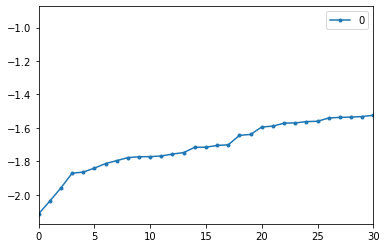

In [18]:
# Plotting Local Outlier Factor analysis
clf = LocalOutlierFactor(n_neighbors=10)
clf.fit_predict(df[num_cols])
df_scores = clf.negative_outlier_factor_

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 30], style='.-')
plt.show(block=True)

In [19]:
# Dropping the outliers 
th = np.sort(df_scores)[4]

df.drop(axis=0, labels=df[df_scores < th].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,856,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,170.2,61.0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,Rare,Gtl,Rare,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298.0,57.2,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,920,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,226.8,42.0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Rare,None,TA,TA,BrkTil,TA,Rare,No,ALQ,216.0,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,961,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,146.8,35.0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,Rare,Gtl,Rare,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,192.0,84.0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,Rare,Gtl,NAmes,Norm,Norm,Rare,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,Gd,TA,No,Unf,595.6,Unf,896.0,896.0,GasA,TA,Y,SBrkr,896,1792,0,0,2,2,4,2,TA,8,Typ,0,Unknown,1961.8,Unknown,0,472.6,Unknown,Unknown,Y,32.0,45.0,0,9,2009,WD,Normal,136000
971,20,RL,78.0,9262,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,Rare,Rare,Stone,Gd,TA,PConc,Gd,TA,No,Unf,32.8,Unf,1573.0,1573.0,GasA,Ex,Y,SBrkr,1578,1578,0,0,2,0,3,1,Ex,7,Typ,1,Attchd,2008.0,Fin,3,840.0,TA,TA,Y,162.4,36.0,0,5,2009,New,Partial,287090
972,20,Rare,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,410.0,Unf,811.0,1221.0,GasA,Ex,Y,SBrkr,1221,1221,1,0,2,0,2,1,Gd,6,Typ,0,Attchd,2004.0,RFn,2,400.0,TA,TA,Y,201.6,113.0,0,10,2009,WD,Normal,185000
973,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,755.0,Unf,953.0,953.0,GasA,Ex,Y,SBrkr,953,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460.0,TA,TA,Y,125.4,40.0,0,8,2007,WD,Normal,175000


In [20]:
# Splitting the train csv dataframe as X_train and y_train
y_train = df["SALEPRICE"]
X_train = df.drop("SALEPRICE", axis=1)

In [21]:
# Applying the label encoding to the binary columns
binary_cols = [col for col in X_train.columns if X_train[col].dtype not in [int, float] and X_train[col].nunique() == 2]
for col in binary_cols:
    labelencoder = LabelEncoder()
    X_train[col] = labelencoder.fit_transform(X_train[col])

# Applying the one hot encoding to rest of the columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_train

,MSSUBCLASS,LOTFRONTAGE,LOTAREA,STREET,LANDCONTOUR,UTILITIES,LANDSLOPE,CONDITION2,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFMATL,BSMTCOND,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,CENTRALAIR,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGEYRBLT,GARAGECARS,GARAGEAREA,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,MSZONING_RM,MSZONING_Rare,LOTSHAPE_Rare,LOTSHAPE_Reg,LOTCONFIG_CulDSac,LOTCONFIG_Inside,LOTCONFIG_Rare,NEIGHBORHOOD_Edwards,NEIGHBORHOOD_Gilbert,NEIGHBORHOOD_NAmes,NEIGHBORHOOD_NWAmes,NEIGHBORHOOD_NridgHt,NEIGHBORHOOD_OldTown,NEIGHBORHOOD_Rare,NEIGHBORHOOD_Sawyer,NEIGHBORHOOD_Somerst,CONDITION1_Norm,CONDITION1_Rare,BLDGTYPE_Rare,BLDGTYPE_TwnhsE,HOUSESTYLE_1Story,HOUSESTYLE_2Story,HOUSESTYLE_Rare,ROOFSTYLE_Hip,ROOFSTYLE_Rare,EXTERIOR1ST_MetalSd,EXTERIOR1ST_Plywood,EXTERIOR1ST_Rare,EXTERIOR1ST_VinylSd,EXTERIOR1ST_Wd Sdng,EXTERIOR2ND_MetalSd,EXTERIOR2ND_Plywood,EXTERIOR2ND_Rare,EXTERIOR2ND_VinylSd,EXTERIOR2ND_Wd Sdng,MASVNRTYPE_None,MASVNRTYPE_Rare,MASVNRTYPE_Stone,EXTERQUAL_Rare,EXTERQUAL_TA,EXTERCOND_Rare,EXTERCOND_TA,FOUNDATION_CBlock,FOUNDATION_PConc,FOUNDATION_Rare,BSMTQUAL_Gd,BSMTQUAL_Rare,BSMTQUAL_TA,BSMTEXPOSURE_Gd,BSMTEXPOSURE_Mn,BSMTEXPOSURE_No,BSMTEXPOSURE_Rare,BSMTFINTYPE1_BLQ,BSMTFINTYPE1_GLQ,BSMTFINTYPE1_LwQ,BSMTFINTYPE1_Rare,BSMTFINTYPE1_Rec,BSMTFINTYPE1_Unf,HEATINGQC_Gd,HEATINGQC_Rare,HEATINGQC_TA,ELECTRICAL_Rare,ELECTRICAL_SBrkr,KITCHENQUAL_Gd,KITCHENQUAL_Rare,KITCHENQUAL_TA,GARAGETYPE_BuiltIn,GARAGETYPE_Detchd,GARAGETYPE_Rare,GARAGETYPE_Unknown,GARAGEFINISH_RFn,GARAGEFINISH_Unf,GARAGEFINISH_Unknown,GARAGEQUAL_TA,GARAGEQUAL_Unknown,GARAGECOND_TA,GARAGECOND_Unknown,PAVEDDRIVE_Rare,PAVEDDRIVE_Y,SALETYPE_Rare,SALETYPE_WD,SALECONDITION_Normal,SALECONDITION_Partial,SALECONDITION_Rare
0,60,65.0,8450,0,0,0,0,0,7,5,2003,2003,0,1,706.0,1,150.0,856.0,0,1,856,1710,1,0,2,1,3,1,8,1,0,2003.0,2,548.0,170.2,61.0,0,2,2008,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0
1,20,80.0,9600,0,0,0,0,0,6,8,1976,1976,0,1,978.0,1,284.0,1262.0,0,1,1262,1262,0,1,2,0,3,1,6,1,1,1976.0,2,460.0,298.0,57.2,0,5,2007,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0
2,60,68.0,11250,0,0,0,0,0,7,5,2001,2002,0,1,486.0,1,434.0,920.0,0,1,920,1786,1,0,2,1,3,1,6,1,1,2001.0,2,608.0,226.8,42.0,0,9,2008,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0
3,70,60.0,9550,0,0,0,0,0,7,5,1915,1970,0,0,216.0,1,540.0,756.0,0,1,961,1717,1,0,1,0,3,1,7,1,1,1998.0,3,642.0,146.8,35.0,0,2,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0
4,60,84.0,14260,0,0,0,0,0,8,5,2000,2000,0,1,655.0,1,490.0,1145.0,0,1,1145,2198,1,0,2,1,4,1,9,1,1,2000.0,3,836.0,192.0,84.0,0,12,2008,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,90,60.0,9000,0,0,0,0,0,5,5,1974,1974,0,1,595.6,1,896.0,896.0,0,1,896,1792,0,0,2,2,4,2,8,1,0,1961.8,0,472.6,32.0,45.0,0,9,2009,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,

In [22]:
# Keeping updated the categorical and numerical features
cat_cols, num_cols, cat_but_car = grab_col_names(X_train)

# Scaling our data into the interval [0, 1]
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train

Observations: 975
Variables: 123
cat_cols: 108
num_cols: 15
cat_but_car: 0
num_but_cat: 108



,MSSUBCLASS,LOTFRONTAGE,LOTAREA,STREET,LANDCONTOUR,UTILITIES,LANDSLOPE,CONDITION2,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFMATL,BSMTCOND,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,CENTRALAIR,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGEYRBLT,GARAGECARS,GARAGEAREA,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,MSZONING_RM,MSZONING_Rare,LOTSHAPE_Rare,LOTSHAPE_Reg,LOTCONFIG_CulDSac,LOTCONFIG_Inside,LOTCONFIG_Rare,NEIGHBORHOOD_Edwards,NEIGHBORHOOD_Gilbert,NEIGHBORHOOD_NAmes,NEIGHBORHOOD_NWAmes,NEIGHBORHOOD_NridgHt,NEIGHBORHOOD_OldTown,NEIGHBORHOOD_Rare,NEIGHBORHOOD_Sawyer,NEIGHBORHOOD_Somerst,CONDITION1_Norm,CONDITION1_Rare,BLDGTYPE_Rare,BLDGTYPE_TwnhsE,HOUSESTYLE_1Story,HOUSESTYLE_2Story,HOUSESTYLE_Rare,ROOFSTYLE_Hip,ROOFSTYLE_Rare,EXTERIOR1ST_MetalSd,EXTERIOR1ST_Plywood,EXTERIOR1ST_Rare,EXTERIOR1ST_VinylSd,EXTERIOR1ST_Wd Sdng,EXTERIOR2ND_MetalSd,EXTERIOR2ND_Plywood,EXTERIOR2ND_Rare,EXTERIOR2ND_VinylSd,EXTERIOR2ND_Wd Sdng,MASVNRTYPE_None,MASVNRTYPE_Rare,MASVNRTYPE_Stone,EXTERQUAL_Rare,EXTERQUAL_TA,EXTERCOND_Rare,EXTERCOND_TA,FOUNDATION_CBlock,FOUNDATION_PConc,FOUNDATION_Rare,BSMTQUAL_Gd,BSMTQUAL_Rare,BSMTQUAL_TA,BSMTEXPOSURE_Gd,BSMTEXPOSURE_Mn,BSMTEXPOSURE_No,BSMTEXPOSURE_Rare,BSMTFINTYPE1_BLQ,BSMTFINTYPE1_GLQ,BSMTFINTYPE1_LwQ,BSMTFINTYPE1_Rare,BSMTFINTYPE1_Rec,BSMTFINTYPE1_Unf,HEATINGQC_Gd,HEATINGQC_Rare,HEATINGQC_TA,ELECTRICAL_Rare,ELECTRICAL_SBrkr,KITCHENQUAL_Gd,KITCHENQUAL_Rare,KITCHENQUAL_TA,GARAGETYPE_BuiltIn,GARAGETYPE_Detchd,GARAGETYPE_Rare,GARAGETYPE_Unknown,GARAGEFINISH_RFn,GARAGEFINISH_Unf,GARAGEFINISH_Unknown,GARAGEQUAL_TA,GARAGEQUAL_Unknown,GARAGECOND_TA,GARAGECOND_Unknown,PAVEDDRIVE_Rare,PAVEDDRIVE_Y,SALETYPE_Rare,SALETYPE_WD,SALECONDITION_Normal,SALECONDITION_Partial,SALECONDITION_Rare
0,0.4,0.4375,0.400706,0,0,0,0,0,7,5,0.951613,0.883333,0,1,0.513494,1,0.082126,0.374447,0,1,0.291492,0.588072,1,0,2,1,3,1,8,1,0,0.932692,2,0.531507,0.479861,0.327160,0,0.090909,2008,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0
1,0.0,0.6250,0.483541,0,0,0,0,0,6,8,0.733871,0.433333,0,1,0.711889,1,0.163043,0.631246,0,1,0.574616,0.380952,0,1,2,0,3,1,6,1,1,0.673077,2,0.410959,0.923611,0.303704,0,0.363636,2007,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0
2,0.4,0.4750,0.602391,0,0,0,0,0,7,5,0.935484,0.866667,0,1,0.353027,1,0.253623,0.414927,0,1,0.336123,0.623209,1,0,2,1,3,1,6,1,1,0.913462,2,0.613699,0.676389,0.209877,0,0.727273,2008,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0
3,0.5,0.3750,0.479939,0,0,0,0,0,7,5,0.241935,0.333333,0,0,0.156090,1,0.317633,0.311195,0,1,0.364714,0.591308,1,0,1,0,3,1,7,1,1,0.884615,3,0.660274,0.398611,0.166667,0,0.090909,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0
4,0.4,0.6750,0.819203,0,0,0,0,0,8,5,0.927419,0.833333,0,1,0.476295,1,0.287440,0.557242,0,1,0.493026,0.813685,1,0,2,1,4,1,9,1,1,0.903846,3,0.926027,0.555556,0.469136,0,1.000000,2008,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [23]:
# Creating a dataframe with the test csv file
X_test = pd.read_csv("test.csv")
X_test.drop("Id", axis=1, inplace=True)
X_test.columns = X_test.columns.str.upper()

X_test

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,ALLEY,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,MASVNRAREA,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTFINSF2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,2NDFLRSF,LOWQUALFINSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,FIREPLACEQU,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,ENCLOSEDPORCH,3SSNPORCH,SCREENPORCH,POOLAREA,POOLQC,FENCE,MISCFEATURE,MISCVAL,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GL

In [24]:
"""
Dropping the same columns(with the train csv dataframe) because 
our train and test dataframe shapes, features must be same to evaluate our model
"""
X_test.drop(["ALLEY", "MASVNRAREA", "BSMTFINSF2", "2NDFLRSF", "LOWQUALFINSF", "FIREPLACEQU", 
              "ENCLOSEDPORCH", "3SSNPORCH", "SCREENPORCH", "POOLQC", "FENCE", "MISCFEATURE", "MISCVAL"], axis=1, inplace=True)

X_test.shape

(1459, 66)

In [25]:
# Showing the information of categorical and numerical columns
cat_cols, num_cols, cat_but_car = grab_col_names(X_test)
print(f"Categorical columns: {cat_cols}\n")
print(f"Numerical columns: {num_cols}")

Observations: 1459
Variables: 66
cat_cols: 48
num_cols: 17
cat_but_car: 1
num_but_cat: 11

Categorical columns: ['MSZONING', 'STREET', 'LOTSHAPE', 'LANDCONTOUR', 'UTILITIES', 'LOTCONFIG', 'LANDSLOPE', 'CONDITION1', 'CONDITION2', 'BLDGTYPE', 'HOUSESTYLE', 'ROOFSTYLE', 'ROOFMATL', 'EXTERIOR1ST', 'EXTERIOR2ND', 'MASVNRTYPE', 'EXTERQUAL', 'EXTERCOND', 'FOUNDATION', 'BSMTQUAL', 'BSMTCOND', 'BSMTEXPOSURE', 'BSMTFINTYPE1', 'BSMTFINTYPE2', 'HEATING', 'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL', 'KITCHENQUAL', 'FUNCTIONAL', 'GARAGETYPE', 'GARAGEFINISH', 'GARAGEQUAL', 'GARAGECOND', 'PAVEDDRIVE', 'SALETYPE', 'SALECONDITION', 'OVERALLCOND', 'BSMTFULLBATH', 'BSMTHALFBATH', 'FULLBATH', 'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR', 'FIREPLACES', 'GARAGECARS', 'POOLAREA', 'YRSOLD']

Numerical columns: ['MSSUBCLASS', 'LOTFRONTAGE', 'LOTAREA', 'OVERALLQUAL', 'YEARBUILT', 'YEARREMODADD', 'BSMTFINSF1', 'BSMTUNFSF', 'TOTALBSMTSF', '1STFLRSF', 'GRLIVAREA', 'TOTRMSABVGRD', 'GARAGEYRBLT', 'GARAGEAREA', 'WOODDECKSF'

In [26]:
# Looking to the features if there are any NaN values
display(pd.DataFrame(X_test.isnull().any()).T)

# Dropping each data that has NaN value
X_test.dropna(inplace=True)
X_test

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
0,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False


,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,270.0,882.0,GasA,TA,Y,SBrkr,896,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,406.0,1329.0,GasA,TA,Y,SBrkr,1329,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,137.0,928.0,GasA,Gd,Y,SBrkr,928,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,324.0,926.0,GasA,Ex,Y,SBrkr,926,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1969,1979,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,PConc,TA,TA,Av,Rec,119.0,BLQ,641.0,1104.0,GasA,Fa,Y,SBrkr,1360,1360,1.0,0.0,1,0,3,1,TA,8,Typ,1,Attchd,1969.0,RFn,1.0,336.0,TA,TA,Y,160,0,0,5,2006,WD,Normal
1452,160,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,408.0,Unf,138.0,546.0,GasA,TA,Y,SBrkr,546,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,12,2006,WD,Abnorml
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,294.0,546.0,GasA,TA,Y,SBrkr,546,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,9,2006,WD,Abnorml


In [27]:
# Bringing the classes that exist less than %5 percent in each column together
X_test = rare_encoder(X_test, 0.05)

In [28]:
# Dropping some numerical outliers
for col in num_cols:
    outlier_indexes = grab_outliers(X_test, col, index=True)
    print(f"{outlier_indexes}\n")
    X_test.drop(outlier_indexes, inplace=True)
    
print(f"\nDataframe shape after the outliers drop: {X_test.shape}")

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
11,160,RM,21.0,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,Rare,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,156.0,Unf,327.0,483.0,GasA,TA,Y,SBrkr,483,987,0.0,0.0,1,1,2,1,TA,5,Typ,0,Detchd,1971.0,Unf,1.0,264.0,TA,TA,Y,275,0,0,2,2010,Rare,Normal
12,160,RM,21.0,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,Rare,2Story,5,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,300.0,Unf,225.0,525.0,GasA,TA,Y,SBrkr,525,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,Detchd,1997.0,Unf,1.0,320.0,TA,TA,Y,0,0,0,3,2010,WD,Normal
13,160,RL,24.0,2280,Pave,Reg,Lvl,AllPub,Rare,Gtl,Rare,Norm,Norm,Rare,2Story,6,6,1975,1975,Gable,CompShg,Plywood,Rare,None,TA,TA,CBlock,TA,TA,No,ALQ,514.0,Unf,341.0,855.0,GasA,TA,Y,SBrkr,855,1456,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,1975.0,Unf,2.0,440.0,TA,TA,Y,173,0,0,6,2010,WD,Normal
36,160,FV,39.0,3515,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,840.0,840.0,GasA,Ex,Y,SBrkr,840,1680,0.0,0.0,2,1,2,1,Gd,3,Typ,0,Attchd,2004.0,RFn,2.0,588.0,TA,TA,Y,0,111,0,1,2010,WD,Normal
37,160,FV,30.0,3215,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,280.0,Unf,320.0,600.0,GasA,Ex,Y,SBrkr,600,1200,0.0,0.0,2,1,2,1,Gd,4,Typ,0,Detchd,2004.0,RFn,2.0,480.0,TA,TA,Y,0,172,0,4,2010,Rare,Normal



Int64Index([  11,   12,   13,   36,   37,   38,   39,   65,   99,  156,  191,
             192,  193,  195,  196,  197,  278,  281,  282,  377,  430,  447,
             448,  449,  501,  502,  503,  504,  523,  559,  566,  567,  568,
             573,  575,  576,  577,  634,  640,  643,  683,  749,  782,  783,
             784,  804,  822,  823,  898,  909,  910, 1012, 1015, 1016, 1021,
            1090, 1106, 1109, 1141, 1144, 1164, 1182, 1183, 1184, 1185, 1186,
            1190, 1253, 1258, 1266, 1293, 1318, 1323, 1404, 1405, 1414, 1446,
            1450, 1452, 1455],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
10,120,Rare,26.0,5858,Pave,IR1,Lvl,AllPub,Rare,Gtl,NAmes,Norm,Norm,TwnhsE,1Story,7,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,1051.0,Rare,354.0,1405.0,GasA,Ex,Y,SBrkr,1337,1337,1.0,0.0,2,0,2,1,Gd,5,Typ,1,Attchd,1999.0,Fin,2.0,511.0,TA,TA,Y,203,68,0,6,2010,WD,Normal
14,120,RL,24.0,2280,Pave,Reg,Lvl,AllPub,Rare,Gtl,Rare,Norm,Norm,Rare,1Story,7,6,1975,1975,Gable,CompShg,Plywood,Rare,None,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,836.0,836.0,GasA,Ex,Y,SBrkr,836,836,0.0,0.0,1,0,2,1,TA,4,Typ,0,Attchd,1975.0,Unf,1.0,308.0,TA,TA,Y,0,30,0,6,2010,WD,Normal
35,120,FV,25.0,4835,Pave,IR1,Lvl,AllPub,Rare,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2004,2005,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Ex,TA,Av,GLQ,1298.0,Unf,190.0,1488.0,GasA,Ex,Y,SBrkr,1488,1488,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Attchd,2004.0,Fin,2.0,506.0,TA,TA,Y,168,50,0,3,2010,WD,Normal
55,50,RL,120.0,17360,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Rare,Norm,1Fam,1.5Fin,6,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,Stone,TA,Gd,CBlock,TA,TA,No,Rec,300.0,Unf,482.0,782.0,GasA,TA,Y,SBrkr,1019,1556,0.0,0.0,2,0,3,1,TA,6,Typ,1,Attchd,1949.0,Unf,2.0,470.0,TA,TA,Y,0,0,0,1,2010,WD,Normal
64,20,RL,119.0,10895,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,CBlock,TA,TA,No,Rec,648.0,Unf,324.0,972.0,GasA,TA,Y,SBrkr,972,972,0.0,0.0,1,0,3,1,TA,5,Typ,0,Attchd,1955.0,Unf,1.0,305.0,TA,TA,Y,0,0,0,6,2010,WD,Normal



Int64Index([  10,   14,   35,   55,   64,  108,  169,  194,  198,  205,  218,
             221,  248,  300,  460,  463,  505,  516,  517,  519,  537,  578,
             780,  799,  814,  821,  824,  833,  835,  920,  964,  983, 1009,
            1053, 1089, 1130, 1181, 1189, 1194, 1195, 1200, 1201, 1222, 1256,
            1282, 1291, 1342, 1361, 1369, 1439, 1456],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
22,20,RL,100.0,18494,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,1324.0,1324.0,GasA,Ex,Y,SBrkr,1324,1324,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Attchd,2005.0,Fin,2.0,430.0,TA,TA,Y,36,23,0,1,2010,WD,Normal
26,60,RL,60.0,17433,Pave,Rare,Lvl,AllPub,Rare,Gtl,Rare,Norm,Norm,1Fam,2Story,8,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,1629.0,1629.0,GasA,Ex,Y,SBrkr,1645,2475,0.0,0.0,2,1,4,1,Gd,7,Typ,1,Attchd,1998.0,Fin,3.0,962.0,TA,TA,Y,23,172,0,1,2010,WD,Normal
112,20,RL,44.0,17485,Pave,Rare,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,7,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Gd,GLQ,1346.0,Unf,162.0,1508.0,GasA,Ex,Y,SBrkr,1508,1508,1.0,0.0,1,0,1,1,Gd,5,Typ,2,Attchd,2009.0,RFn,2.0,572.0,TA,TA,Y,0,0,0,1,2010,Rare,Partial
137,80,RL,85.0,19645,Pave,IR1,Lvl,AllPub,Rare,Gtl,Rare,Norm,Norm,1Fam,Rare,7,6,1994,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,343.0,Unf,80.0,423.0,GasA,Ex,Y,SBrkr,896,1652,1.0,0.0,2,1,3,1,Gd,6,Typ,0,BuiltIn,1994.0,RFn,2.0,473.0,TA,TA,Y,0,0,0,6,2010,WD,Normal
206,60,RL,59.0,23303,Pave,Rare,Lvl,AllPub,Rare,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,1230.0,Unf,278.0,1508.0,GasA,Ex,Y,SBrkr,1508,2520,1.0,0.0,2,1,5,1,Ex,10,Typ,1,BuiltIn,2007.0,Fin,3.0,640.0,TA,TA,Y,192,273,0,6,2009,WD,Rare



Int64Index([  22,   26,  112,  137,  206,  394,  446,  490,  561,  689,  748,
             772,  803,  834,  916, 1026, 1034, 1043, 1057, 1076, 1113, 1147,
            1168, 1173, 1336, 1362, 1420, 1436],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION



Int64Index([], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION



Int64Index([], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION



Int64Index([], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
203,20,RL,105.0,13693,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Rare,Rare,1Fam,1Story,10,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,Rare,TA,PConc,Ex,TA,Gd,GLQ,2288.0,Unf,342.0,2630.0,GasA,Ex,Y,SBrkr,2674,2674,2.0,0.0,2,1,2,1,Ex,8,Typ,2,Attchd,2007.0,Fin,3.0,762.0,TA,TA,Y,360,50,0,3,2009,WD,Normal
211,20,RL,110.0,15274,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2003,2003,Hip,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,TA,No,GLQ,1972.0,Unf,480.0,2452.0,GasA,Ex,Y,SBrkr,2452,2452,2.0,0.0,2,0,3,1,Ex,10,Typ,1,Attchd,2003.0,Fin,3.0,886.0,TA,TA,Y,0,116,0,7,2009,WD,Normal
217,20,RL,100.0,14836,Pave,IR1,HLS,AllPub,Inside,Rare,NridgHt,Norm,Norm,1Fam,1Story,10,5,2004,2005,Hip,CompShg,Rare,Rare,Stone,Rare,TA,PConc,Ex,TA,Gd,GLQ,2146.0,Unf,346.0,2492.0,GasA,Ex,Y,SBrkr,2492,2492,1.0,0.0,2,1,2,1,Ex,8,Typ,1,Attchd,2004.0,Fin,3.0,949.0,TA,TA,Y,226,235,0,2,2009,WD,Abnorml
245,20,RL,85.0,11128,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Rare,Rare,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,Rare,TA,PConc,Ex,TA,Gd,GLQ,2158.0,Unf,300.0,2458.0,GasA,Ex,Y,SBrkr,2490,2490,1.0,0.0,2,0,2,1,Ex,9,Typ,2,Attchd,2005.0,Fin,3.0,795.0,TA,TA,Y,70,226,0,10,2009,WD,Normal
514,20,RL,106.0,12720,Pave,Reg,HLS,AllPub,Inside,Rare,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,MetalSd,MetalSd,Stone,Rare,TA,PConc,Ex,TA,Gd,GLQ,2257.0,Unf,278.0,2535.0,GasA,Ex,Y,SBrkr,2470,2470,2.0,0.0,1,1,1,1,Ex,7,Typ,2,Attchd,2003.0,Fin,3.0,789.0,TA,TA,Y,154,65,144,2,2008,WD,Normal
701,20,RL,91.0,11778,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Gd,GLQ,2085.0,Unf,186.0,2271.0,GasA,Ex,Y,SBrkr,2276,2276,1.0,0.0,2,0,3,1,Ex,7,Typ,2,Attchd,2008.0,RFn,3.0,1348.0,Rare,TA,Y,0,0,0,6,2008,WD,Abnorml



Int64Index([203, 211, 217, 245, 514, 701], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
18,20,RL,79.0,14122,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2005,2006,Hip,CompShg,Rare,Rare,BrkFace,Gd,TA,PConc,Ex,TA,No,GLQ,28.0,Unf,1794.0,1822.0,GasA,Ex,Y,SBrkr,1822,1822,0.0,0.0,2,0,3,1,Ex,8,Typ,1,Attchd,2005.0,RFn,3.0,678.0,TA,TA,Y,0,119,0,2,2010,WD,Normal
204,20,RL,95.0,11578,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,Stone,Rare,TA,PConc,Ex,TA,No,Unf,0.0,Unf,1736.0,1736.0,GasA,Ex,Y,SBrkr,1736,1736,0.0,0.0,2,0,3,1,Ex,7,Typ,1,Attchd,2008.0,RFn,3.0,834.0,TA,TA,Y,319,90,0,7,2009,WD,Normal
241,20,RL,86.0,11194,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Rare,Norm,1Fam,1Story,8,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,1696.0,1696.0,GasA,Ex,Y,SBrkr,1696,1696,0.0,0.0,2,0,3,1,Gd,7,Typ,0,Attchd,2008.0,RFn,3.0,972.0,TA,TA,Y,120,56,0,9,2009,WD,Normal
251,20,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,1836.0,1836.0,GasA,Ex,Y,SBrkr,1836,1836,0.0,0.0,2,0,3,1,Gd,8,Typ,1,Attchd,2009.0,Fin,2.0,517.0,TA,TA,Y,0,175,0,10,2009,New,Partial
313,90,RL,76.0,9482,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Rare,1Story,5,4,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,1866.0,1866.0,GasA,Ex,Y,SBrkr,1866,1866,0.0,0.0,2,0,4,2,TA,8,Typ,0,Detchd,1958.0,Unf,2.0,495.0,TA,Rare,Y,0,0,0,12,2009,WD,Normal



Int64Index([  18,  204,  241,  251,  313,  588,  607,  827,  837,  838,  891,
            1046, 1131, 1138, 1158, 1193],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
19,20,RL,110.0,14300,Pave,Reg,HLS,AllPub,Inside,Rare,NridgHt,Norm,Norm,1Fam,1Story,9,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,Rare,TA,PConc,Ex,TA,Gd,GLQ,1373.0,Unf,1473.0,2846.0,GasA,Ex,Y,SBrkr,2696,2696,1.0,0.0,2,1,3,1,Ex,10,Typ,2,Attchd,2003.0,Fin,3.0,958.0,TA,TA,Y,220,150,0,6,2010,WD,Normal
202,20,RL,95.0,12350,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,Rare,TA,PConc,Ex,TA,Av,GLQ,1232.0,Unf,788.0,2020.0,GasA,Ex,Y,SBrkr,2020,2020,1.0,0.0,2,0,3,1,Ex,7,Typ,1,Attchd,2008.0,RFn,3.0,896.0,TA,TA,Y,192,98,0,5,2009,WD,Normal
507,20,RL,105.0,13693,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Gd,GLQ,1728.0,Rare,195.0,2418.0,GasA,Ex,Y,SBrkr,2464,2464,1.0,0.0,2,1,4,1,Ex,9,Typ,1,Attchd,2007.0,Fin,3.0,650.0,TA,TA,Y,358,78,0,8,2008,WD,Normal
806,20,RL,85.0,14082,Pave,IR1,HLS,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,Rare,Gd,GLQ,1558.0,Unf,662.0,2220.0,GasA,Ex,Y,SBrkr,2234,2234,1.0,0.0,1,1,1,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2.0,724.0,TA,TA,Y,390,80,0,1,2007,WD,Normal
828,20,RL,110.0,14333,Pave,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Gd,GLQ,1518.0,Unf,590.0,2108.0,GasA,Ex,Y,SBrkr,2122,2122,1.0,0.0,2,1,2,1,Gd,7,Typ,1,Attchd,2007.0,Fin,3.0,938.0,TA,TA,Y,130,142,0,11,2007,New,Partial
832,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,Rare,TA,PConc,Ex,TA,Gd,GLQ,1812.0,Unf,740.0,2552.0,GasA,Ex,Y,SBrkr,2552,2552,1.0,0.0,2,0,3,1,Ex,8,Typ,2,Attchd,2007.0,Fin,3.0,932.0,TA,TA,Y,130,28,0,10,2007,New,Partial
1229,60,FV,100.0,13162,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,2Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Ex,TA,No,GLQ,1836.0,Unf,200.0,2036.0,GasA,Ex,Y,SBrkr,2036,2640,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Attchd,2006.0,RFn,3.0,792.0,TA,TA,Y,0,265,0,11,2006,New,Partial



Int64Index([19, 202, 507, 806, 828, 832, 1229], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
831,20,RL,105.0,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,Rare,TA,PConc,Ex,TA,Gd,GLQ,1430.0,Unf,564.0,1994.0,GasA,Ex,Y,SBrkr,2046,2046,1.0,0.0,2,1,2,1,Ex,7,Typ,2,Attchd,2005.0,Fin,3.0,878.0,TA,TA,Y,188,65,0,8,2007,WD,Normal
915,20,RL,80.0,12000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,7,6,1980,1980,Hip,CompShg,VinylSd,MetalSd,BrkFace,Gd,TA,CBlock,Gd,TA,No,GLQ,1732.0,Unf,270.0,2002.0,GasA,Ex,Y,SBrkr,2362,2362,1.0,0.0,2,1,3,1,Gd,8,Typ,1,Attchd,1980.0,RFn,2.0,546.0,Rare,TA,Y,180,16,0,3,2007,WD,Normal
1035,20,RL,102.0,12671,Pave,IR1,Lvl,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,1Story,6,7,1954,1994,Hip,CompShg,MetalSd,MetalSd,Stone,TA,Gd,CBlock,Gd,Rare,No,LwQ,353.0,Unf,935.0,1288.0,GasA,Ex,Y,SBrkr,2422,2422,0.0,0.0,3,0,4,1,Gd,6,Rare,2,Attchd,1954.0,Fin,2.0,527.0,TA,TA,Y,0,63,0,7,2007,WD,Normal
1250,80,RL,100.0,14330,Pave,IR1,Rare,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,Rare,7,4,1974,1974,Gable,CompShg,Rare,Wd Sdng,BrkFace,Gd,Rare,CBlock,Gd,TA,Gd,ALQ,1023.0,Rare,228.0,1748.0,GasA,Gd,Y,SBrkr,2151,2646,1.0,2.0,2,0,3,1,Gd,9,Rare,4,Attchd,1974.0,RFn,2.0,550.0,TA,TA,Y,641,100,800,1,2006,WD,Normal



Int64Index([831, 915, 1035, 1250], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
46,60,RL,80.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,6,5,1993,1993,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,PConc,Gd,TA,Mn,GLQ,1137.0,Unf,143.0,1280.0,GasA,Ex,Y,SBrkr,1280,2495,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,1993.0,Unf,2.0,660.0,TA,TA,Y,224,32,0,3,2010,WD,Normal
200,60,RL,110.0,14257,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Rare,Norm,1Fam,2Story,9,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,Rare,TA,PConc,Ex,TA,No,GLQ,1360.0,Unf,416.0,1776.0,GasA,Ex,Y,SBrkr,1794,2772,1.0,0.0,3,1,4,1,Ex,10,Typ,3,BuiltIn,2007.0,Fin,3.0,754.0,TA,TA,Y,135,64,0,6,2009,WD,Normal
201,60,RL,95.0,12350,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Ex,TA,No,GLQ,986.0,Unf,379.0,1365.0,GasA,Ex,Y,SBrkr,1365,2690,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Attchd,2009.0,RFn,3.0,864.0,TA,TA,Y,0,197,0,7,2009,New,Partial
237,60,RL,106.0,12720,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,1173.0,Unf,282.0,1455.0,GasA,Ex,Y,SBrkr,1466,2687,1.0,0.0,2,1,4,1,Gd,10,Typ,2,BuiltIn,2000.0,RFn,3.0,810.0,TA,TA,Y,252,30,0,9,2009,WD,Normal
285,80,RL,80.0,9600,Pave,Reg,Rare,AllPub,Rare,Rare,Rare,Feedr,Norm,1Fam,Rare,8,5,1976,1976,Gable,CompShg,Plywood,Plywood,BrkFace,Gd,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,392.0,392.0,GasA,Ex,Y,SBrkr,1487,2499,0.0,0.0,2,1,4,1,TA,5,Typ,1,Attchd,1976.0,Unf,2.0,527.0,TA,TA,Y,0,64,0,1,2009,WD,Abnorml



Int64Index([  46,  200,  201,  237,  285,  287,  330,  483,  509,  510,  564,
             646,  802,  829,  830,  870,  871,  872,  875, 1167, 1170, 1171,
            1191, 1221, 1251, 1367],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
136,90,RL,78.0,15600,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,Rare,2Story,5,6,1950,1991,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,Gd,CBlock,TA,TA,No,ALQ,375.0,Unf,657.0,1032.0,GasA,Ex,Y,SBrkr,1102,2177,0.0,0.0,2,1,5,2,TA,11,Typ,0,Detchd,1950.0,Unf,2.0,484.0,TA,TA,Y,0,0,0,3,2010,WD,Normal
346,90,RM,57.0,10307,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Rare,2Story,6,5,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,Mn,LwQ,633.0,Unf,339.0,972.0,GasA,Gd,Rare,FuseA,972,1944,1.0,0.0,2,0,4,2,TA,12,Typ,0,Detchd,1920.0,Unf,2.0,324.0,Fa,TA,N,0,28,0,6,2009,WD,Normal
452,70,RM,50.0,8660,Pave,Reg,Rare,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,5,6,1900,1993,Rare,CompShg,Rare,Rare,None,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,760.0,760.0,GasA,Ex,Rare,SBrkr,928,2168,0.0,0.0,2,0,5,1,Gd,11,Typ,0,Detchd,1998.0,Unf,2.0,576.0,TA,TA,Y,467,160,0,12,2009,WD,Normal
538,60,RL,97.0,10990,Pave,IR1,Lvl,AllPub,Rare,Gtl,Rare,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Ex,TA,No,GLQ,851.0,Unf,213.0,1064.0,GasA,Ex,Y,SBrkr,1064,2125,1.0,0.0,2,1,4,1,Gd,12,Typ,2,Attchd,1996.0,RFn,2.0,576.0,TA,TA,Y,168,0,0,6,2008,WD,Normal
1169,60,RL,63.0,12292,Pave,IR1,HLS,AllPub,Rare,Gtl,Rare,Norm,Norm,1Fam,2Story,9,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,Rare,Gd,GLQ,205.0,Unf,889.0,1094.0,GasA,Ex,Y,SBrkr,1102,2473,0.0,0.0,2,1,4,1,Gd,11,Typ,1,BuiltIn,2006.0,Fin,3.0,675.0,TA,TA,Y,246,39,0,7,2006,New,Partial



Int64Index([136, 346, 452, 538, 1169], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION



Int64Index([], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
115,60,RL,87.0,12361,Pave,IR1,Lvl,AllPub,Rare,Gtl,Rare,Norm,Norm,1Fam,2Story,6,7,1993,1993,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,Gd,PConc,Gd,TA,No,GLQ,860.0,Unf,86.0,946.0,GasA,Ex,Y,SBrkr,964,1802,0.0,1.0,2,1,3,1,Gd,8,Typ,1,Rare,2000.0,RFn,4.0,1017.0,TA,TA,Y,450,92,0,5,2010,WD,Normal
368,30,RM,50.0,8635,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,5,5,1925,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,TA,Rare,BrkTil,TA,TA,No,LwQ,134.0,Unf,938.0,1072.0,GasA,TA,Y,SBrkr,1072,1072,1.0,0.0,1,0,2,1,TA,5,Typ,0,Detchd,1982.0,Unf,5.0,1184.0,Fa,TA,Rare,0,0,0,8,2009,WD,Normal
404,20,RL,84.0,10933,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,9,5,2009,2009,Hip,CompShg,VinylSd,VinylSd,Stone,Rare,TA,PConc,Ex,TA,Gd,GLQ,1021.0,Unf,534.0,1555.0,GasA,Ex,Y,SBrkr,1680,1680,1.0,0.0,1,1,1,1,Ex,8,Typ,1,Attchd,2009.0,Fin,3.0,1138.0,TA,TA,Y,185,24,0,7,2009,New,Partial
420,20,RL,90.0,11664,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,1234.0,Unf,335.0,1569.0,GasA,Ex,Y,SBrkr,1611,1611,1.0,0.0,2,0,3,1,Gd,6,Typ,0,Attchd,2002.0,RFn,3.0,1231.0,TA,TA,Y,262,93,0,9,2009,WD,Normal
511,60,RL,102.0,12151,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2005,Gable,CompShg,Rare,Rare,BrkFace,Gd,TA,PConc,Ex,TA,Av,GLQ,1249.0,Unf,165.0,1414.0,GasA,Ex,Y,SBrkr,1414,2331,1.0,0.0,2,1,3,1,Ex,9,Typ,1,BuiltIn,2005.0,Fin,3.0,1003.0,TA,TA,Y,192,63,0,8,2008,WD,Normal
611,50,RL,60.0,10836,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,5,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,892.0,892.0,GasA,Ex,Y,SBrkr,1254,1436,0.0,1.0,1,0,3,1,TA,7,Typ,1,Detchd,1968.0,Unf,4.0,1488.0,Fa,TA,N,0,0,0,6,2008,WD,Normal
879,20,RL,98.0,12291,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,10,5,2007,2007,Hip,CompShg,Rare,Rare,BrkFace,Rare,TA,PConc,Ex,TA,Av,GLQ,1572.0,Unf,394.0,1966.0,GasA,Ex,Y,SBrkr,1966,1966,1.0,0.0,2,0,1,1,Ex,6,Typ,1,Attchd,2007.0,Fin,3.0,1092.0,TA,TA,Y,76,52,0,10,2007,New,Partial
913,60,FV,106.0,8413,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,Gd,Gd,PConc,Ex,TA,Mn,GLQ,901.0,Unf,319.0,1220.0,GasA,Ex,Y,SBrkr,1220,2362,1.0,0.0,2,1,3,1,Gd,8,Typ,2,Attchd,1998.0,RFn,2.0,1105.0,Rare,TA,Y,147,0,0,6,2007,WD,Normal



Int64Index([115, 368, 404, 420, 511, 611, 879, 913], dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
67,50,RL,60.0,8064,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Rare,Norm,1Fam,1.5Fin,6,8,1948,2004,Gable,CompShg,Rare,Rare,None,TA,TA,CBlock,TA,TA,No,ALQ,481.0,Rare,161.0,816.0,GasA,TA,Y,SBrkr,816,1224,1.0,0.0,1,0,3,1,TA,5,Typ,0,Detchd,1950.0,Unf,1.0,280.0,TA,TA,Y,414,0,0,5,2010,WD,Normal
69,20,RL,80.0,9760,Pave,Reg,Lvl,AllPub,Inside,Rare,NAmes,Norm,Norm,1Fam,1Story,6,7,1963,1984,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,Gd,BLQ,717.0,Rare,415.0,1395.0,GasA,TA,Y,SBrkr,1395,1395,1.0,0.0,1,0,2,1,TA,7,Rare,1,Attchd,1963.0,RFn,2.0,440.0,TA,TA,Y,657,0,0,5,2010,WD,Normal
158,20,RL,76.0,12887,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,5,7,1984,1984,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,Gd,TA,Mn,Rec,207.0,Rare,36.0,833.0,GasA,TA,Y,SBrkr,833,833,1.0,0.0,1,0,2,1,Gd,5,Typ,0,Attchd,1984.0,Unf,2.0,495.0,TA,TA,Y,431,0,0,4,2010,WD,Normal
441,20,RL,80.0,14680,Pave,IR1,HLS,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,5,4,1960,1960,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Rec,793.0,Unf,480.0,1273.0,GasA,Ex,Y,SBrkr,1273,1273,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1960.0,Unf,1.0,307.0,TA,TA,Y,483,0,0,6,2009,WD,Normal
491,20,RL,85.0,14450,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,7,5,1979,1979,Hip,CompShg,Plywood,Plywood,BrkFace,Gd,TA,CBlock,Gd,Rare,No,ALQ,864.0,Rare,469.0,1782.0,GasA,TA,Y,SBrkr,1782,1782,0.0,1.0,2,0,3,1,Gd,6,Typ,1,Attchd,1979.0,Fin,2.0,551.0,TA,TA,Y,467,0,0,3,2008,WD,Normal



Int64Index([  67,   69,  158,  441,  491,  600,  696,  740,  765,  815,  869,
             903,  967, 1014, 1159, 1363, 1378, 1382, 1415],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
42,20,FV,57.0,12853,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2010,2010,Gable,CompShg,Rare,Rare,None,Gd,TA,PConc,Ex,Rare,No,GLQ,1032.0,Unf,610.0,1642.0,GasA,Ex,Y,SBrkr,1418,1418,1.0,0.0,1,1,1,1,Gd,6,Typ,1,Attchd,2010.0,RFn,3.0,852.0,TA,TA,Y,160,192,0,4,2010,New,Partial
43,60,FV,68.0,7379,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,484.0,Unf,491.0,975.0,GasA,Ex,Y,SBrkr,975,1848,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,2000.0,RFn,2.0,592.0,TA,TA,Y,280,184,0,4,2010,WD,Normal
49,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1966,1966,Hip,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,698.0,Unf,534.0,1232.0,GasA,TA,Y,SBrkr,1232,1232,1.0,0.0,1,1,3,1,TA,6,Typ,0,Attchd,1966.0,RFn,2.0,490.0,TA,TA,Y,0,224,0,4,2010,WD,Normal
77,70,RM,60.0,9600,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,9,1900,2003,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,Gd,BrkTil,TA,TA,No,Unf,0.0,Unf,930.0,930.0,Rare,TA,Rare,SBrkr,930,1566,0.0,0.0,2,0,3,1,Gd,7,Typ,0,Detchd,1930.0,Unf,1.0,288.0,TA,TA,Y,54,228,0,4,2010,WD,Abnorml
114,20,RL,83.0,11980,Pave,Reg,Rare,AllPub,Inside,Rare,Rare,Norm,Norm,1Fam,1Story,7,5,1987,1987,Gable,CompShg,Plywood,Plywood,BrkFace,Gd,TA,CBlock,Gd,TA,Gd,GLQ,1433.0,Unf,0.0,1433.0,GasA,Ex,Y,SBrkr,1433,1433,1.0,0.0,1,1,1,1,Gd,4,Typ,2,Attchd,1987.0,RFn,2.0,528.0,Rare,Rare,Y,0,278,0,6,2010,WD,Normal



Int64Index([  42,   43,   49,   77,  114,  163,  176,  210,  255,  312,  340,
             357,  382,  407,  429,  472,  508,  595,  597,  613,  616,  625,
             641,  661,  665,  667,  669,  694,  753,  768,  775,  776,  839,
             876,  886,  890,  907,  911,  918,  970, 1120, 1177, 1252, 1257,
            1283, 1301, 1328, 1403, 1443],
           dtype='int64')



,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION



Int64Index([], dtype='int64')


Dataframe shape after the outliers drop: (809, 66)


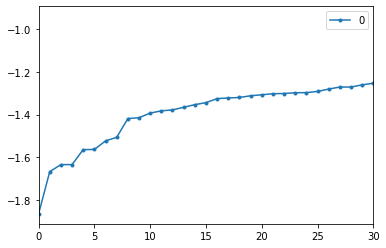

In [29]:
# Plotting Local Outlier Factor analysis
clf = LocalOutlierFactor(n_neighbors=10)
clf.fit_predict(X_test[num_cols])
df_scores = clf.negative_outlier_factor_

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 30], style='.-')
plt.show(block=True)

In [30]:
# Dropping the outliers 
th = np.sort(df_scores)[9]

X_test.drop(axis=0, labels=X_test[df_scores < th].index, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,SALETYPE,SALECONDITION
0,20,Rare,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,468.0,Rare,270.0,882.0,GasA,TA,Y,SBrkr,896,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,406.0,1329.0,GasA,TA,Y,SBrkr,1329,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,137.0,928.0,GasA,Gd,Y,SBrkr,928,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,324.0,926.0,GasA,Ex,Y,SBrkr,926,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,Rare,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,20,RL,95.0,13618,Pave,Reg,Lvl,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,Rare,Av,GLQ,1350.0,Unf,378.0,1728.0,GasA,Ex,Y,SBrkr,1960,1960,1.0,0.0,2,0,3,1,Gd,8,Typ,2,Attchd,2005.0,Fin,3.0,714.0,TA,TA,Y,172,38,0,11,2006,New,Partial
796,90,RM,78.0,7020,Pave,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,Rare,Rare,7,5,1997,1997,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,Gd,PConc,Gd,TA,Gd,GLQ,1243.0,Unf,45.0,1288.0,GasA,Gd,Y,SBrkr,1368,1368,2.0,0.0,2,0,2,2,TA,8,Typ,0,Attchd,1997.0,Fin,4.0,784.0,TA,TA,Y,0,48,0,11,2006,WD,Normal
797,20,RL,58.0,10172,Pave,IR1,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,5,7,1968,2003,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,ALQ,441.0,Unf,423.0,864.0,GasA,Ex,Y,SBrkr,874,874,1.0,0.0,1,0,3,1,TA,5,Typ,0,Attchd,1968.0,RFn,1.0,288.0,TA,TA,Y,0,120,0,10,2006,WD,Normal
798,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,Inside,Rare,Rare,Norm,Norm,1Fam,1Story,5,5,1969,1979,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,PConc,TA,TA,Av,Rec,119.0,Rare,641.0,1104.0,GasA,Rare,Y,SBrkr,1360,1360,1.0,0.0,1,0,3,1,TA,8,Typ,1,Attchd,1969.0,RFn,1.0,336.0,TA,TA,Y,160,0,0,5,2006,WD,Normal


In [31]:
# Applying the label encoding to the binary columns
binary_cols = [col for col in X_test.columns if X_test[col].dtype not in [int, float] and X_test[col].nunique() == 2]
for col in binary_cols:
    labelencoder = LabelEncoder()
    X_test[col] = labelencoder.fit_transform(X_test[col])

# Applying the one hot encoding to rest of the columns
X_test = pd.get_dummies(X_test, drop_first=True)
X_test

,MSSUBCLASS,LOTFRONTAGE,LOTAREA,STREET,LANDSLOPE,CONDITION2,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFMATL,BSMTCOND,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,CENTRALAIR,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGEYRBLT,GARAGECARS,GARAGEAREA,GARAGECOND,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,MSZONING_RL,MSZONING_RM,MSZONING_Rare,LOTSHAPE_Rare,LOTSHAPE_Reg,LANDCONTOUR_Lvl,LANDCONTOUR_Rare,LOTCONFIG_Inside,LOTCONFIG_Rare,NEIGHBORHOOD_Edwards,NEIGHBORHOOD_Gilbert,NEIGHBORHOOD_NAmes,NEIGHBORHOOD_NridgHt,NEIGHBORHOOD_OldTown,NEIGHBORHOOD_Rare,NEIGHBORHOOD_Somerst,CONDITION1_Norm,CONDITION1_Rare,BLDGTYPE_Rare,BLDGTYPE_TwnhsE,HOUSESTYLE_1Story,HOUSESTYLE_2Story,HOUSESTYLE_Rare,ROOFSTYLE_Hip,ROOFSTYLE_Rare,EXTERIOR1ST_MetalSd,EXTERIOR1ST_Plywood,EXTERIOR1ST_Rare,EXTERIOR1ST_VinylSd,EXTERIOR1ST_Wd Sdng,EXTERIOR2ND_MetalSd,EXTERIOR2ND_Plywood,EXTERIOR2ND_Rare,EXTERIOR2ND_VinylSd,EXTERIOR2ND_Wd Sdng,MASVNRTYPE_None,MASVNRTYPE_Rare,MASVNRTYPE_Stone,EXTERQUAL_Rare,EXTERQUAL_TA,EXTERCOND_Rare,EXTERCOND_TA,FOUNDATION_CBlock,FOUNDATION_PConc,FOUNDATION_Rare,BSMTQUAL_Gd,BSMTQUAL_Rare,BSMTQUAL_TA,BSMTEXPOSURE_Gd,BSMTEXPOSURE_Mn,BSMTEXPOSURE_No,BSMTFINTYPE1_BLQ,BSMTFINTYPE1_GLQ,BSMTFINTYPE1_LwQ,BSMTFINTYPE1_Rec,BSMTFINTYPE1_Unf,HEATINGQC_Gd,HEATINGQC_Rare,HEATINGQC_TA,ELECTRICAL_Rare,ELECTRICAL_SBrkr,KITCHENQUAL_Gd,KITCHENQUAL_Rare,KITCHENQUAL_TA,GARAGETYPE_BuiltIn,GARAGETYPE_Detchd,GARAGETYPE_Rare,GARAGEFINISH_RFn,GARAGEFINISH_Unf,GARAGEQUAL_Rare,GARAGEQUAL_TA,PAVEDDRIVE_Rare,PAVEDDRIVE_Y,SALETYPE_Rare,SALETYPE_WD,SALECONDITION_Normal,SALECONDITION_Partial,SALECONDITION_Rare
0,20,80.0,11622,0,0,0,5,6,1961,1961,0,1,468.0,0,270.0,882.0,0,1,896,896,0.0,0.0,1,0,2,0,5,1,0,1961.0,1.0,730.0,1,140,0,0,6,2010,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0
1,20,81.0,14267,0,0,0,6,6,1958,1958,0,1,923.0,1,406.0,1329.0,0,1,1329,1329,0.0,0.0,1,1,3,0,6,1,0,1958.0,1.0,312.0,1,393,36,0,6,2010,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0
2,60,74.0,13830,0,0,0,5,5,1997,1998,0,1,791.0,1,137.0,928.0,0,1,928,1629,0.0,0.0,2,1,3,0,6,1,1,1997.0,2.0,482.0,1,212,34,0,3,2010,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0
3,60,78.0,9978,0,0,0,6,6,1998,1998,0,1,602.0,1,324.0,926.0,0,1,926,1604,0.0,0.0,2,1,3,0,7,1,1,1998.0,2.0,470.0,1,360,36,0,6,2010,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0
4,120,43.0,5005,0,0,0,8,5,1992,1992,0,1,263.0,1,1017.0,1280.0,0,1,1280,1280,0.0,0.0,2,0,2,0,5,1,0,1992.0,2.0,506.0,1,0,82,0,1,2010,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,20,95.0,13618,0,0,0,8,5,2005,2006,0,0,1350.0,1,378.0,1728.0,0,1,1960,1960,1.0,0.0,2,0,3,0,8,1,2,2005.0,3.0,714.0,1,172,38,0,11,2006,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
796,90,78.0,7020,0,0,0,7,5,1997,1997,0,1,1243.0,1,45.0,1288.0,0,1,1368,1368,2.0,0.0,2,0,2,1,8,1,0,1997.0,4.0,784.0

In [32]:
# Showing the information of categorical and numerical columns
cat_cols, num_cols, cat_but_car = grab_col_names(X_test)

# Scaling our data into the interval [0, 1]
scaler = MinMaxScaler()
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test

Observations: 800
Variables: 116
cat_cols: 101
num_cols: 15
cat_but_car: 0
num_but_cat: 101



,MSSUBCLASS,LOTFRONTAGE,LOTAREA,STREET,LANDSLOPE,CONDITION2,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFMATL,BSMTCOND,BSMTFINSF1,BSMTFINTYPE2,BSMTUNFSF,TOTALBSMTSF,HEATING,CENTRALAIR,1STFLRSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,GARAGEYRBLT,GARAGECARS,GARAGEAREA,GARAGECOND,WOODDECKSF,OPENPORCHSF,POOLAREA,MOSOLD,YRSOLD,MSZONING_RL,MSZONING_RM,MSZONING_Rare,LOTSHAPE_Rare,LOTSHAPE_Reg,LANDCONTOUR_Lvl,LANDCONTOUR_Rare,LOTCONFIG_Inside,LOTCONFIG_Rare,NEIGHBORHOOD_Edwards,NEIGHBORHOOD_Gilbert,NEIGHBORHOOD_NAmes,NEIGHBORHOOD_NridgHt,NEIGHBORHOOD_OldTown,NEIGHBORHOOD_Rare,NEIGHBORHOOD_Somerst,CONDITION1_Norm,CONDITION1_Rare,BLDGTYPE_Rare,BLDGTYPE_TwnhsE,HOUSESTYLE_1Story,HOUSESTYLE_2Story,HOUSESTYLE_Rare,ROOFSTYLE_Hip,ROOFSTYLE_Rare,EXTERIOR1ST_MetalSd,EXTERIOR1ST_Plywood,EXTERIOR1ST_Rare,EXTERIOR1ST_VinylSd,EXTERIOR1ST_Wd Sdng,EXTERIOR2ND_MetalSd,EXTERIOR2ND_Plywood,EXTERIOR2ND_Rare,EXTERIOR2ND_VinylSd,EXTERIOR2ND_Wd Sdng,MASVNRTYPE_None,MASVNRTYPE_Rare,MASVNRTYPE_Stone,EXTERQUAL_Rare,EXTERQUAL_TA,EXTERCOND_Rare,EXTERCOND_TA,FOUNDATION_CBlock,FOUNDATION_PConc,FOUNDATION_Rare,BSMTQUAL_Gd,BSMTQUAL_Rare,BSMTQUAL_TA,BSMTEXPOSURE_Gd,BSMTEXPOSURE_Mn,BSMTEXPOSURE_No,BSMTFINTYPE1_BLQ,BSMTFINTYPE1_GLQ,BSMTFINTYPE1_LwQ,BSMTFINTYPE1_Rec,BSMTFINTYPE1_Unf,HEATINGQC_Gd,HEATINGQC_Rare,HEATINGQC_TA,ELECTRICAL_Rare,ELECTRICAL_SBrkr,KITCHENQUAL_Gd,KITCHENQUAL_Rare,KITCHENQUAL_TA,GARAGETYPE_BuiltIn,GARAGETYPE_Detchd,GARAGETYPE_Rare,GARAGEFINISH_RFn,GARAGEFINISH_Unf,GARAGEQUAL_Rare,GARAGEQUAL_TA,PAVEDDRIVE_Rare,PAVEDDRIVE_Y,SALETYPE_Rare,SALETYPE_WD,SALECONDITION_Normal,SALECONDITION_Partial,SALECONDITION_Rare
0,0.0,0.6250,0.648006,0,0,0,5,6,0.625954,0.183333,0,1,0.278240,0,0.162260,0.397140,0,1,0.299083,0.238886,0.0,0.0,1,0,2,0,5,1,0,0.570175,1.0,0.746445,1,0.345679,0.000000,0,0.454545,2010,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0
1,0.0,0.6375,0.847028,0,0,0,6,6,0.603053,0.133333,0,1,0.548751,1,0.243990,0.643014,0,1,0.563914,0.450415,0.0,0.0,1,1,3,0,6,1,0,0.543860,1.0,0.251185,1,0.970370,0.211765,0,0.454545,2010,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0
2,0.4,0.5500,0.814146,0,0,0,5,5,0.900763,0.800000,0,1,0.470273,1,0.082332,0.422442,0,1,0.318654,0.596971,0.0,0.0,2,1,3,0,6,1,1,0.885965,2.0,0.452607,1,0.523457,0.200000,0,0.181818,2010,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0
3,0.4,0.6000,0.524304,0,0,0,6,6,0.908397,0.800000,0,1,0.357907,1,0.194712,0.421342,0,1,0.317431,0.584758,0.0,0.0,2,1,3,0,7,1,1,0.894737,2.0,0.438389,1,0.888889,0.211765,0,0.454545,2010,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0
4,1.0,0.1625,0.150113,0,0,0,8,5,0.862595,0.700000,0,1,0.156361,1,0.611178,0.616062,0,1,0.533945,0.426478,0.0,0.0,2,0,2,0,5,1,0,0.842105,2.0,0.481043,1,0.000000,0.482353,0,0.000000,2010,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.8125,0.798194,0,0,0,8,5,0.961832,0.933333,0,0,0.802616,1,0.227163,0.862486,0,1,0.949847,0.758671,1.0,0.0,2,0,3,0,8,1,2,0.

In [33]:
# Finding the columns that exist in both dataframes
common_col_names = np.intersect1d(X_train.columns, X_test.columns)
common_col_names

array(['1STFLRSF', 'BEDROOMABVGR', 'BLDGTYPE_Rare', 'BLDGTYPE_TwnhsE',
       'BSMTCOND', 'BSMTEXPOSURE_Gd', 'BSMTEXPOSURE_Mn',
       'BSMTEXPOSURE_No', 'BSMTFINSF1', 'BSMTFINTYPE1_BLQ',
       'BSMTFINTYPE1_GLQ', 'BSMTFINTYPE1_LwQ', 'BSMTFINTYPE1_Rec',
       'BSMTFINTYPE1_Unf', 'BSMTFINTYPE2', 'BSMTFULLBATH', 'BSMTHALFBATH',
       'BSMTQUAL_Gd', 'BSMTQUAL_Rare', 'BSMTQUAL_TA', 'BSMTUNFSF',
       'CENTRALAIR', 'CONDITION1_Norm', 'CONDITION1_Rare', 'CONDITION2',
       'ELECTRICAL_Rare', 'ELECTRICAL_SBrkr', 'EXTERCOND_Rare',
       'EXTERCOND_TA', 'EXTERIOR1ST_MetalSd', 'EXTERIOR1ST_Plywood',
       'EXTERIOR1ST_Rare', 'EXTERIOR1ST_VinylSd', 'EXTERIOR1ST_Wd Sdng',
       'EXTERIOR2ND_MetalSd', 'EXTERIOR2ND_Plywood', 'EXTERIOR2ND_Rare',
       'EXTERIOR2ND_VinylSd', 'EXTERIOR2ND_Wd Sdng', 'EXTERQUAL_Rare',
       'EXTERQUAL_TA', 'FIREPLACES', 'FOUNDATION_CBlock',
       'FOUNDATION_PConc', 'FOUNDATION_Rare', 'FULLBATH', 'FUNCTIONAL',
       'GARAGEAREA', 'GARAGECARS', 'GARAGEFINISH_R

In [34]:
# Updating the train and test dataframes of input features by the common features of both dataframes
X_train = X_train[common_col_names]
X_test = X_test[common_col_names]

In [35]:
X_train

,1STFLRSF,BEDROOMABVGR,BLDGTYPE_Rare,BLDGTYPE_TwnhsE,BSMTCOND,BSMTEXPOSURE_Gd,BSMTEXPOSURE_Mn,BSMTEXPOSURE_No,BSMTFINSF1,BSMTFINTYPE1_BLQ,BSMTFINTYPE1_GLQ,BSMTFINTYPE1_LwQ,BSMTFINTYPE1_Rec,BSMTFINTYPE1_Unf,BSMTFINTYPE2,BSMTFULLBATH,BSMTHALFBATH,BSMTQUAL_Gd,BSMTQUAL_Rare,BSMTQUAL_TA,BSMTUNFSF,CENTRALAIR,CONDITION1_Norm,CONDITION1_Rare,CONDITION2,ELECTRICAL_Rare,ELECTRICAL_SBrkr,EXTERCOND_Rare,EXTERCOND_TA,EXTERIOR1ST_MetalSd,EXTERIOR1ST_Plywood,EXTERIOR1ST_Rare,EXTERIOR1ST_VinylSd,EXTERIOR1ST_Wd Sdng,EXTERIOR2ND_MetalSd,EXTERIOR2ND_Plywood,EXTERIOR2ND_Rare,EXTERIOR2ND_VinylSd,EXTERIOR2ND_Wd Sdng,EXTERQUAL_Rare,EXTERQUAL_TA,FIREPLACES,FOUNDATION_CBlock,FOUNDATION_PConc,FOUNDATION_Rare,FULLBATH,FUNCTIONAL,GARAGEAREA,GARAGECARS,GARAGEFINISH_RFn,GARAGEFINISH_Unf,GARAGEQUAL_TA,GARAGETYPE_BuiltIn,GARAGETYPE_Detchd,GARAGETYPE_Rare,GARAGEYRBLT,GRLIVAREA,HALFBATH,HEATING,HEATINGQC_Gd,HEATINGQC_Rare,HEATINGQC_TA,HOUSESTYLE_1Story,HOUSESTYLE_2Story,HOUSESTYLE_Rare,KITCHENABVGR,KITCHENQUAL_Gd,KITCHENQUAL_Rare,KITCHENQUAL_TA,LANDSLOPE,LOTAREA,LOTCONFIG_Inside,LOTCONFIG_Rare,LOTFRONTAGE,LOTSHAPE_Rare,LOTSHAPE_Reg,MASVNRTYPE_None,MASVNRTYPE_Rare,MASVNRTYPE_Stone,MOSOLD,MSSUBCLASS,MSZONING_RM,MSZONING_Rare,NEIGHBORHOOD_Edwards,NEIGHBORHOOD_Gilbert,NEIGHBORHOOD_NAmes,NEIGHBORHOOD_NridgHt,NEIGHBORHOOD_OldTown,NEIGHBORHOOD_Rare,NEIGHBORHOOD_Somerst,OPENPORCHSF,OVERALLCOND,OVERALLQUAL,PAVEDDRIVE_Rare,PAVEDDRIVE_Y,POOLAREA,ROOFMATL,ROOFSTYLE_Hip,ROOFSTYLE_Rare,SALECONDITION_Normal,SALECONDITION_Partial,SALECONDITION_Rare,SALETYPE_Rare,SALETYPE_WD,STREET,TOTALBSMTSF,TOTRMSABVGRD,WOODDECKSF,YEARBUILT,YEARREMODADD,YRSOLD
0,0.291492,3,0,0,1,0,0,1,0.513494,0,1,0,0,0,1,1,0,1,0,0,0.082126,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,2,1,0.531507,2,1,0,1,0,0,0,0.932692,0.588072,1,0,0,0,0,0,1,0,1,1,0,0,0,0.400706,1,0,0.4375,0,1,0,0,0,0.090909,0.4,0,0,0,0,0,0,0,0,0,0.327160,5,7,0,1,0,0,0,0,1,0,0,0,1,0,0.374447,8,0.479861,0.951613,0.883333,2008
1,0.574616,3,0,0,1,1,0,0,0.711889,0,0,0,0,0,1,0,1,1,0,0,0.163043,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,2,1,0.410959,2,1,0,1,0,0,0,0.673077,0.380952,0,0,0,0,0,1,0,0,1,0,0,1,0,0.483541,0,1,0.6250,0,1,1,0,0,0.363636,0.0,0,0,0,0,0,0,0,1,0,0.303704,8,6,0,1,0,0,0,0,1,0,0,0,1,0,0.631246,6,0.923611,0.733871,0.433333,2007
2,0.336123,3,0,0,1,0,1,0,0.353027,0,1,0,0,0,1,1,0,1,0,0,0.253623,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,2,1,0.613699,2,1,0,1,0,0,0,0.913462,0.623209,1,0,0,0,0,0,1,0,1,1,0,0,0,0.602391,1,0,0.4750,0,0,0,0,0,0.727273,0.4,0,0,0,0,0,0,0,0,0,0.209877,5,7,0,1,0,0,0,0,1,0,0,0,1,0,0.414927,6,0.676389,0.935484,0.866667,2008
3,0.364714,3,0,0,0,0,0,1,0.156090,0,0,0,0,0,1,1,0,0,0,1,0.317633,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0.660274,3,0,1,1,0,1,0,0.884615,0.591308,0,0,1,0,0,0,1,0,1,1,0,0,0,0.479939,0,0,0.3750,0,0,1,0,0,0.090909,0.5,0,0,0,0,0,0,0,1,0,0.166667,5,7,0,1,0,0,0,0,0,0,0,0,1,0,0.311195,7,0.398611,0.241935,0.333333,2006
4,0.493026,4,0,0,1,0,0,0,0.476295,0,1,0,0,0,1,1,0,1,0,0,0.287440,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,2,1,0.926027,3,1,0,1,0,0,0,0.903846,0.813685,1,0,0,0,0,0,1,0,1,1,0,0,0,0.819203,0,1,0.6750,0,0,0,0,0,1.000000,0.4,0,0,0,0,0,0,0,1,0,0.469136,5,8,0,1,0,0,0,0,1,0,0,0,1,0,0.557242,9,0.555556,0.927419,0.833333,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,0.319386,4,1,0,1,0,0,1,0.432969,0,0,0,0,1,1,0,0,1,0,0,0.532609,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,2,1,0.428219,0,0,0,0,0,0,0,0.536538,0.625982,2,0,0,0,1,0,1,0,2,0,0,1,0,0.440323,0,1,0.3750,0,1,1,0,0,0.727273,0.7,0,0,0,0,1,0,0,0,0,0.228395,5,5,0,1,0,0,0,0,1,0,0,0,1,0,0.399747,8,0.000000

In [36]:
X_test

,1STFLRSF,BEDROOMABVGR,BLDGTYPE_Rare,BLDGTYPE_TwnhsE,BSMTCOND,BSMTEXPOSURE_Gd,BSMTEXPOSURE_Mn,BSMTEXPOSURE_No,BSMTFINSF1,BSMTFINTYPE1_BLQ,BSMTFINTYPE1_GLQ,BSMTFINTYPE1_LwQ,BSMTFINTYPE1_Rec,BSMTFINTYPE1_Unf,BSMTFINTYPE2,BSMTFULLBATH,BSMTHALFBATH,BSMTQUAL_Gd,BSMTQUAL_Rare,BSMTQUAL_TA,BSMTUNFSF,CENTRALAIR,CONDITION1_Norm,CONDITION1_Rare,CONDITION2,ELECTRICAL_Rare,ELECTRICAL_SBrkr,EXTERCOND_Rare,EXTERCOND_TA,EXTERIOR1ST_MetalSd,EXTERIOR1ST_Plywood,EXTERIOR1ST_Rare,EXTERIOR1ST_VinylSd,EXTERIOR1ST_Wd Sdng,EXTERIOR2ND_MetalSd,EXTERIOR2ND_Plywood,EXTERIOR2ND_Rare,EXTERIOR2ND_VinylSd,EXTERIOR2ND_Wd Sdng,EXTERQUAL_Rare,EXTERQUAL_TA,FIREPLACES,FOUNDATION_CBlock,FOUNDATION_PConc,FOUNDATION_Rare,FULLBATH,FUNCTIONAL,GARAGEAREA,GARAGECARS,GARAGEFINISH_RFn,GARAGEFINISH_Unf,GARAGEQUAL_TA,GARAGETYPE_BuiltIn,GARAGETYPE_Detchd,GARAGETYPE_Rare,GARAGEYRBLT,GRLIVAREA,HALFBATH,HEATING,HEATINGQC_Gd,HEATINGQC_Rare,HEATINGQC_TA,HOUSESTYLE_1Story,HOUSESTYLE_2Story,HOUSESTYLE_Rare,KITCHENABVGR,KITCHENQUAL_Gd,KITCHENQUAL_Rare,KITCHENQUAL_TA,LANDSLOPE,LOTAREA,LOTCONFIG_Inside,LOTCONFIG_Rare,LOTFRONTAGE,LOTSHAPE_Rare,LOTSHAPE_Reg,MASVNRTYPE_None,MASVNRTYPE_Rare,MASVNRTYPE_Stone,MOSOLD,MSSUBCLASS,MSZONING_RM,MSZONING_Rare,NEIGHBORHOOD_Edwards,NEIGHBORHOOD_Gilbert,NEIGHBORHOOD_NAmes,NEIGHBORHOOD_NridgHt,NEIGHBORHOOD_OldTown,NEIGHBORHOOD_Rare,NEIGHBORHOOD_Somerst,OPENPORCHSF,OVERALLCOND,OVERALLQUAL,PAVEDDRIVE_Rare,PAVEDDRIVE_Y,POOLAREA,ROOFMATL,ROOFSTYLE_Hip,ROOFSTYLE_Rare,SALECONDITION_Normal,SALECONDITION_Partial,SALECONDITION_Rare,SALETYPE_Rare,SALETYPE_WD,STREET,TOTALBSMTSF,TOTRMSABVGRD,WOODDECKSF,YEARBUILT,YEARREMODADD,YRSOLD
0,0.299083,2,0,0,1,0,0,1,0.278240,0,0,0,1,0,0,0.0,0.0,0,0,1,0.162260,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0.746445,1.0,0,1,1,0,0,0,0.570175,0.238886,0,0,0,0,1,1,0,0,0,0,0,1,0,0.648006,1,0,0.6250,0,1,1,0,0,0.454545,0.0,0,1,0,0,1,0,0,0,0,0.000000,6,5,0,1,0,0,0,0,1,0,0,0,1,0,0.397140,5,0.345679,0.625954,0.183333,2010
1,0.563914,3,0,0,1,0,0,1,0.548751,0,0,0,0,0,1,0.0,0.0,0,0,1,0.243990,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0.251185,1.0,0,1,1,0,0,0,0.543860,0.450415,1,0,0,0,1,1,0,0,0,1,0,0,0,0.847028,0,0,0.6375,0,0,0,0,0,0.454545,0.0,0,0,0,0,1,0,0,0,0,0.211765,6,6,0,1,0,0,1,0,1,0,0,0,1,0,0.643014,6,0.970370,0.603053,0.133333,2010
2,0.318654,3,0,0,1,0,0,1,0.470273,0,1,0,0,0,1,0.0,0.0,1,0,0,0.082332,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,2,1,0.452607,2.0,0,0,1,0,0,0,0.885965,0.596971,1,0,1,0,0,0,1,0,0,0,0,1,0,0.814146,1,0,0.5500,0,0,1,0,0,0.181818,0.4,0,0,0,1,0,0,0,0,0,0.200000,5,5,0,1,0,0,0,0,1,0,0,0,1,0,0.422442,6,0.523457,0.900763,0.800000,2010
3,0.317431,3,0,0,1,0,0,1,0.357907,0,1,0,0,0,1,0.0,0.0,0,0,1,0.194712,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,2,1,0.438389,2.0,0,0,1,0,0,0,0.894737,0.584758,1,0,0,0,0,0,1,0,0,1,0,0,0,0.524304,1,0,0.6000,0,0,0,0,0,0.454545,0.4,0,0,0,1,0,0,0,0,0,0.211765,6,6,0,1,0,0,0,0,1,0,0,0,1,0,0.421342,7,0.888889,0.908397,0.800000,2010
4,0.533945,2,0,1,1,0,0,1,0.156361,0,0,0,0,0,1,0.0,0.0,1,0,0,0.611178,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0.481043,2.0,1,0,1,0,0,0,0.842105,0.426478,0,0,0,0,0,1,0,0,0,1,0,0,0,0.150113,1,0,0.1625,0,0,1,0,0,0.000000,1.0,0,0,0,0,0,0,0,1,0,0.482353,5,8,0,1,0,0,0,0,1,0,0,0,1,0,0.616062,5,0.000000,0.862595,0.700000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.949847,3,0,0,0,0,0,0,0.802616,0,1,0,0,0,1,1.0,0.0,0,0,0,0.227163,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2,0,1,0,2,1,0.727488,3.0,0,0,1,0,0,0,0.956140,0.758671,0,0,0,0,0,1,0,0,0,1,0,0,0,0.798194,0,0,0.8125,0,1,0,0,1,0.909091,0.0,0,0,0,0,0,0,0,1,0,0.223529,5,8,0,1,0,0

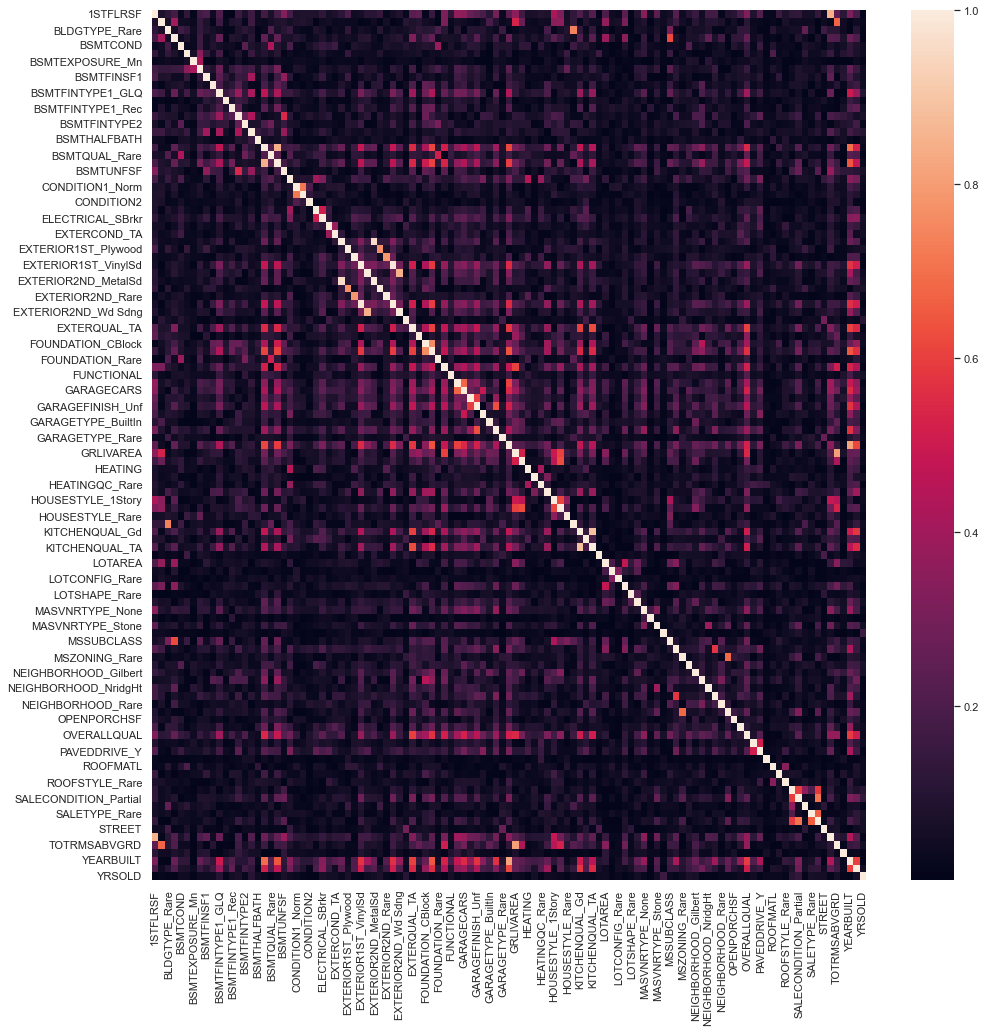

In [37]:
# Showing the correlations
correlations = X_train.corr().abs()
sns.set(rc={'figure.figsize': (16, 16)})
sns.heatmap(correlations)
plt.show(block=True)

In [38]:
# Selecting the upper triangle of correlation matrix
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(bool))

# Finding the features with a correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Columns that will drop because of the high correlation: {to_drop}")

# Dropping the features that have a correlation greater than 0.9 from both dataframes 
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

Columns that will drop because of the high correlation: ['EXTERIOR2ND_MetalSd', 'EXTERIOR2ND_VinylSd']


In [39]:
"""
Creating a regression model and giving the fitting the created model 
by Randomized Search CV by many parameters to find our best hyperparameters
""" 
model = GradientBoostingRegressor()
parameters = {'learning_rate': list(np.arange(0.01, 0.1, 0.01)),
              'subsample': list(np.arange(0.1, 1.0, 0.01)),
              'n_estimators': list(range(100, 5000, 100)), 
              'min_samples_split': list(range(2, 100)),
              'max_depth': list(range(1, 20))}
grid_model = RandomizedSearchCV(estimator=model, param_distributions=parameters, 
                          scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
fitted = grid_model.fit(X_train, y_train)

In [40]:
# RMSE result
rmse_score = np.sqrt(-(fitted.best_score_))
print(f"RMSE score is: {rmse_score}")

# Best parameters
print(f"Best parameters are: {fitted.best_params_}")

RMSE score is: 15172.397819279035
Best parameters are: {'subsample': 0.34999999999999987, 'n_estimators': 3700, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.01}


In [41]:
"""
Fitting the not yet fitted model because cross validate already fits the model. 
This is done by the best parameters of Randomized Search CV and 5-fold cross validation
"""
unfitted_final_model = model.set_params(**fitted.best_params_)
final_score = cross_validate(unfitted_final_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

In [42]:
# Showing the y_train's numerical info
y_train_info = pd.DataFrame(y_train.describe()).T
display(y_train_info)

# Showing the average RMSE score of 5-folds
rmse_score = np.sqrt(-(final_score["test_score"].mean()))
print(f"Average RMSE is: {rmse_score}")

# Normalized RMSE(Being closer to 0 is better)
normalized_rmse_score = rmse_score / (y_train_info["max"] - y_train_info["min"]) 
print(f"Normalized RMSE is: {normalized_rmse_score[0]}")

,count,mean,std,min,25%,50%,75%,max
SALEPRICE,975.0,161699.605128,49469.871776,37900.0,127500.0,154900.0,191500.0,297000.0


Average RMSE is: 15159.446706250712
Normalized RMSE is: 0.05850809226650217


In [43]:
# Updating the Gradient Boosting Model with the best parameters of Randomized Search CV
fitted_final_model = model.set_params(**fitted.best_params_).fit(X_train, y_train)

# Making the predictions by test dataset
pred = pd.DataFrame(fitted_final_model.predict(X_test), columns=["Sale Price Prediction"])
pred

,Sale Price Prediction
0,127125.939723
1,159796.513984
2,186957.228483
3,197324.207517
4,175109.923337
...,...
795,277284.569016
796,212661.019774
797,139039.479121
798,161558.955109
